# Chicago Taxi Trips Analysis

This file focuses on performing EDA to identify trends that would be helpful for the tableau dashboard along with modeling later. The data that we are using is taken from BigQuery on GCP. This is a subset of the original 200M+ row dataset taking records only from 2021 and 2022. The csvs were downloaded from SQL queries taken on BigQuery. 

**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
import scipy.stats as stats

**Read Data File**

In [2]:
#df= pd.read_csv("C://Users//JCCLI//Downloads//Chicago_Taxi_Final_Merged_New.csv",\
                #usecols=('unique_key','trip_miles','payment_type','company','fare_dollars','trip_minutes','year',\
                         #'month','day','hour','weekday', 'dropoff_area','trip_start_dt','cost_per_minute','pick_up_area',\
                         #'mph','Temperature','Total Precipitation','Wind_Gust','Snow_Amount_in','Wind_Speed [10 m]'))

In [3]:
#df_tips = pd.read_csv("C://Users//JCCLI//Downloads//Chicago_Taxi_Trips_Tips.csv")

In [4]:
#df_with_tips = pd.merge(df,df_tips,on=['unique_key','year','month','day','hour'])

In [5]:
#df_with_tips = df_with_tips.drop('unique_key',axis=1)

In [6]:
#df_with_tips.to_csv("C://Users//JCCLI//Downloads//Chicago_Taxi_With_Tips.csv",index=False,header=True)

In [7]:
df = pd.read_csv("C://Users//JCCLI//Downloads//Chicago_Taxi_EDA.csv")

**Preprocessing**

In [8]:
# Check metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967150 entries, 0 to 6967149
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_miles           float64
 1   payment_type         object 
 2   company              object 
 3   pickup_latitude      float64
 4   pickup_longitude     float64
 5   dropoff_latitude     float64
 6   dropoff_longitude    float64
 7   fare_dollars         float64
 8   trip_start_dt        object 
 9   trip_end_dt          object 
 10  year                 int64  
 11  month                int64  
 12  day                  int64  
 13  hour                 int64  
 14  weekday              object 
 15  dropoff_area         object 
 16  cost_per_mile        float64
 17  cost_per_minute      float64
 18  pick_up_area         object 
 19  mph                  float64
 20  trip_seconds         float64
 21  trip_minutes         float64
 22  Date                 object 
 23  Temperature          float64
 24

In [9]:
# Change Year, Month, Day & Hour to categorical for EDA
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')
df['hour'] = df['hour'].astype('category')
df['trip_start_dt'] = pd.to_datetime(df['trip_start_dt'])
df['Week'] = df['trip_start_dt'].dt.isocalendar().week

In [10]:

df['week_start_dt'] = pd.to_datetime(
    df['year'].astype(str) + df['Week'].astype(str) + "1",
    format='%G%V%w'
)

In [11]:
# Check for missing data
df.isna().sum()

trip_miles                  0
payment_type                0
company                     0
pickup_latitude        617769
pickup_longitude       617769
dropoff_latitude       774114
dropoff_longitude      774114
fare_dollars                0
trip_start_dt               0
trip_end_dt                 0
year                        0
month                       0
day                         0
hour                        0
weekday                     0
dropoff_area                0
cost_per_mile          297979
cost_per_minute             0
pick_up_area                0
mph                         0
trip_seconds                0
trip_minutes                0
Date                        0
Temperature                 0
Total Precipitation         0
Wind_Gust                   0
Snow_Amount_in              0
Wind_Speed [10 m]           0
Wind Speed [100 m]     297979
Week                        0
week_start_dt               0
dtype: int64

In [16]:
df.head(10)

,trip_miles,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,fare_dollars,trip_start_dt,trip_end_dt,...,trip_minutes,Date,Temperature,Total Precipitation,Wind_Gust,Snow_Amount_in,Wind_Speed [10 m],Wind Speed [100 m],Week,week_start_dt
0,11.42,Prcard,Flash Cab,41.690633,-87.570058,41.689730,-87.669054,31.00,2021-01-11,2021-01-11,...,24.350000,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
1,8.30,Unknown,Taxi Affiliation Services,41.690633,-87.570058,NaN,NaN,24.25,2021-01-11,2021-01-11,...,23.000000,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
2,11.90,Unknown,Taxi Affiliation Services,41.809084,-87.632425,NaN,NaN,30.50,2021-01-11,2021-01-11,...,16.000000,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
3,9.41,Prcard,Flash Cab,41.823713,-87.602350,41.763247,-87.616134,30.00,2021-01-11,2021-01-11,...,39.650000,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
4,9.90,Credit Card,"Taxicab Insurance Agency, LLC",41.927261,-87.765502,41.874005,-87.663518,25.50,2021-01-11,2021-01-11,...,24.000000,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
5,3.20,Cash,Taxi Affiliation Services,41.983636,-87.723583,41.986712,-87.663416,12.50,2021-01-11,2021-01-11,...,15.000000,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
6,1.43,Cash,Flash Cab,41.954028,-87.763399,41.953582,-87.723452,8.00,2021-01-11,2021-01-11,...,19.066667,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
7,8.47,Prcard,Flash Cab,41.978830,-87.771167,41.922761,-87.699155,30.50,2021-01-11,2021-01-11,...,38.033333,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
8,2.13,Prcard,Flash Cab,41.823713,-87.602350,41.835118,-87.618678,12.00,2021-01-11,2021-01-11,...,18.300000,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11
9,10.90,Unknown,Blue Ribbon Taxi Association Inc.,41.706126,-87.598256,41.842076,-87.633973,30.25,2021-01-11,2021-01-11,...,23.000000,2021-01-11 14:00:00,31.946442,0.0,6.262704,0.0,0.316314,0.500137,2,2021-01-11


### Feature Engineering

**Create New Classification and Dummy Variables**

**Main Dataset**

In [12]:
def trip_miles_cat(x):
    if x < 10:
        return "Less than 10 mi"
    elif x>=10 and x<30:
        return "Between 10 and 30 mi"
    else:
        return "More than 30 mi"
df['Distance Category']= df['trip_miles'].apply(trip_miles_cat)

In [13]:
def trip_duration(x):
    if x < 5:
        return "Less than 5 minutes"
    elif x >= 5 and x < 15:
        return "Between 5 and 15 minutes"
    elif x >= 15 and x < 30:
        return "Between 15 and 30 minutes"
    else:
        return "30 or more minutes"
df['Duration Category'] = df['trip_minutes'].apply(trip_duration)

In [14]:
def airport(x):
    if x =='ORD Airport' or x== 'MDW Airport':
        return 1
    else:
        return 0
df['Pickup at Airport'] = df['pick_up_area'].apply(airport)

In [15]:
def airport_dropoff(x):
    if x=='ORD Airport' or x== 'MDW Airport':
        return 1
    else:
        return 0
df['Dropoff at Airport'] = df['dropoff_area'].apply(airport_dropoff)

In [16]:
def holiday(x):
    if x == '2021-01-18' or x=='2022-01-17':
        return 'Martin Luther King Day'
    elif x == '2021-02-14' or x=='2022-02-14':
        return 'Valentines Day'
    elif x=='2021-03-17' or x=='2022-03-17':
        return 'St Patricks Day'
    elif x=='2021-04-04' or x=='2022-04-17':
        return 'Easter'
    elif x=='2021-05-31' or x=='2022-05-30':
        return 'Memorial Day'
    elif x=='2021-07-04' or x=='2022-07-04':
        return 'Independence Day'
    elif x=='2021-09-06' or x=='2022-09-05':
        return 'Labor Day'
    elif x=='2021-10-31' or x=='2022-10-31':
        return 'Halloween'
    elif x=='2021-11-25' or x=='2022-11-24':
        return 'Thanksgiving'
    elif x=='2021-12-25' or x=='2022-12-25':
        return 'Christmas'
    elif x=='2021-12-31' or x=='2022-12-31':
        return 'New Years'
    else:
        return 'Not a Holiday'
df['Holiday']=df['trip_end_dt'].apply(holiday)

**Weather Dataset**

In [17]:
def rain(x):
    if x>0:
        return 1
    else:
        return 0
df['Is Raining'] = df['Total Precipitation'].apply(rain)

In [18]:
def rain_func(x):
    if x==0:
        return 'No Rain'
    elif x>0 and x<1:
        return 'Light Rain'
    else:
        return 'Heavy Rain'
df['Rain Category'] = df['Total Precipitation'].apply(rain_func)

In [19]:
def snow_func(x):
    if x>0:
        return 1
    else:
        return 0
df['Is Snow Day'] = df['Snow_Amount_in'].apply(snow_func)

In [20]:
def temperature(x):
    if x < 30:
        return 'Below 30 Degrees'
    elif x >= 30 and x < 50:
        return 'Between 30 and 50 Degrees'
    elif x >= 50 and x < 70:
        return 'Between 50 and 70 Degrees'
    else:
        return 'Above 70 Degrees'
df['Temperature Range'] = df['Temperature'].apply(temperature)

In [21]:
def snow_category(x):
    if x ==0:
        return 'No Snow'
    elif x < 0.1 and x > 0:
        return 'Light'
    elif x>=0.1 and x<0.2:
        return 'Moderate'
    else:
        return 'Heavy'
df['Snow Category'] =  df['Snow_Amount_in'].apply(snow_category)      

In [22]:
def wind(x):
    if x > 10:
        return 1
    else:
        return 0
df['Is Windy (Speed)'] = df['Wind_Speed [10 m]'].apply(wind)

In [23]:
def wind_gust(x):
    if x > 15:
        return 1
    else:
        return 0
df['Is Windy (Gust)'] = df['Wind_Gust'].apply(wind_gust)

In [24]:
def is_holiday(x):
    if x == 'Christmas' or x=='Valentines Day' or x == 'St Patricks Day' or x == 'Martin Luther King Day' or x == 'Easter' or x == 'Memorial Day' or x=='Independence Day' or x== 'Labor Day' or x=='Halloween' or x=='New Years' or x=='Thanksgiving':
        return 1
    else:
        return 0
df['Is Holiday'] = df['Holiday'].apply(is_holiday)

# Exploratory Data Analysis

**Which year got the most number of rides?**

Text(0, 0.5, 'Number of rides')

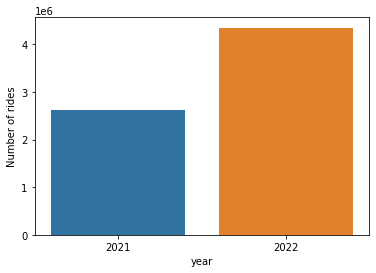

In [25]:
sns.countplot(x='year',data=df)
plt.ylabel('Number of rides')

2022 got more rides than 2021, as expected since in 2021 we were still recovering from the pandemic

**Which month got the most rides?**

Text(0.5, 1.0, 'Number of rides by month')

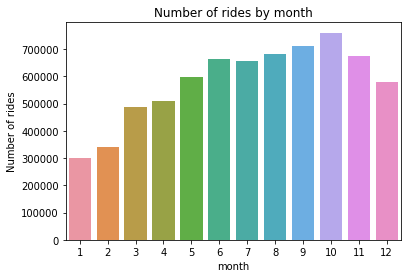

In [26]:
sns.countplot(x = 'month',data=df)
plt.ylabel('Number of rides')
plt.title("Number of rides by month")

Overall, October got the most rides along with the summer too, as it is noted as summertime and early fall are peak times tourists visit Chicago.

<Axes: xlabel='month', ylabel='count'>

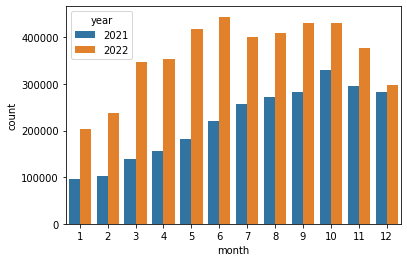

In [27]:
# By year
sns.countplot(x='month',hue='year',data=df)

June of 2022 got the most rides in 2022, whereas in 2021 October to the most rides.

<Axes: xlabel='weekday', ylabel='count'>

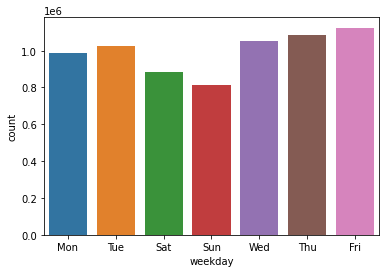

In [33]:
# By day of week
sns.countplot(x='weekday',data=df)

It appears that Thursdays and Fridays are peak days for taxi trips where weekend days (Saturday and Sunday) are the least busiest days for taxi trips.

<Axes: xlabel='hour', ylabel='count'>

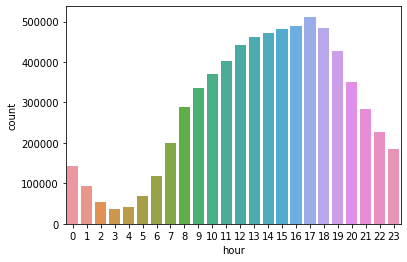

In [34]:
# By Hour
sns.countplot(x='hour',data=df)

It makes sense for hour 17 (or 5 pm) to have the most trips since it is when most people are off work and would use public transportation to get home from work.

<Axes: xlabel='hour', ylabel='count'>

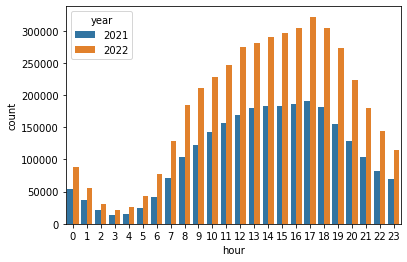

In [35]:
sns.countplot(x='hour',hue='year',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

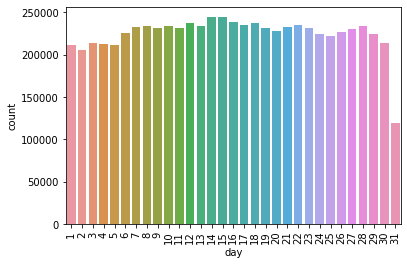

In [36]:
# By day of month
sns.countplot(x='day',data=df)
plt.xticks(rotation=90)

From the bar graph above, it looks like the middle of the month is when the number of trips peaks on average during 2021 and 2022.

**What was the distribution of trip miles?**

Text(0.5, 1.0, 'Distribution of Trip Distance')

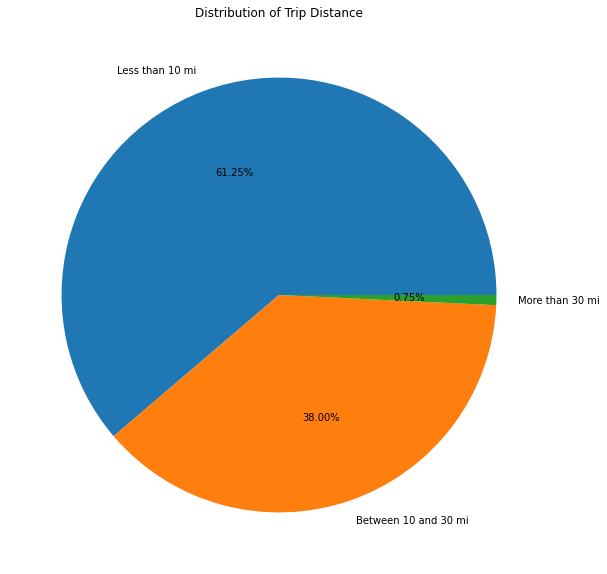

In [37]:
plt.figure(figsize=(10,10))
plt.pie(df['Distance Category'].value_counts().values,labels=df['Distance Category'].value_counts().index, autopct= '%1.2f%%')
plt.title("Distribution of Trip Distance")

Text(0, 0.5, 'Average Fare ($)')

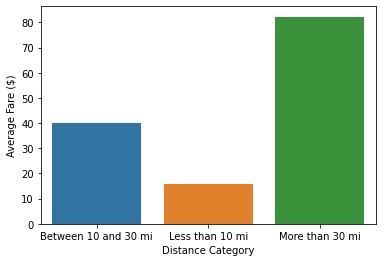

In [35]:
df_dist = df[['Distance Category','fare_dollars']]
df_dist_avg = df_dist.groupby('Distance Category',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Distance Category',y='fare_dollars',data=df_dist_avg)
plt.xlabel('Distance Category')
plt.ylabel('Average Fare ($)')

**What was the distribution of trip duration?**

Text(0.5, 1.0, 'Distribution of Trip Duration')

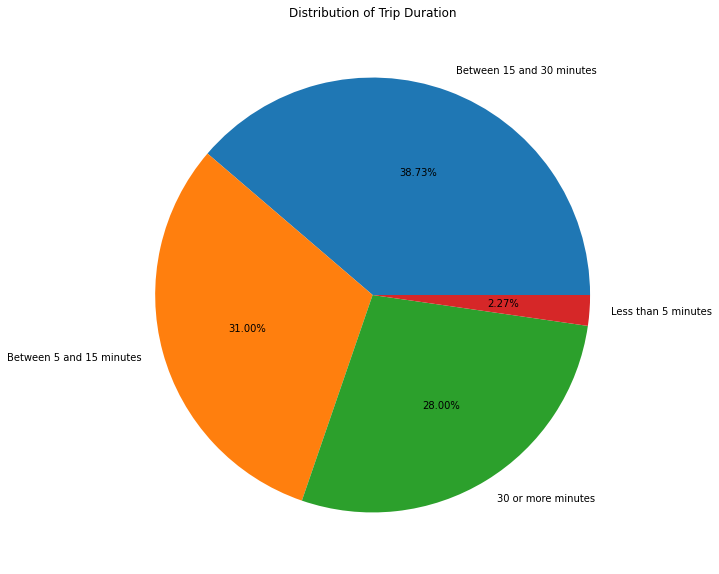

In [38]:
plt.figure(figsize=(10,10))
plt.pie(df['Duration Category'].value_counts().values,labels=df['Duration Category'].value_counts().index, autopct= '%1.2f%%')
plt.title("Distribution of Trip Duration")

(array([0, 1, 2, 3]),
 [Text(0, 0, '30 or more minutes'),
  Text(1, 0, 'Between 15 and 30 minutes'),
  Text(2, 0, 'Between 5 and 15 minutes'),
  Text(3, 0, 'Less than 5 minutes')])

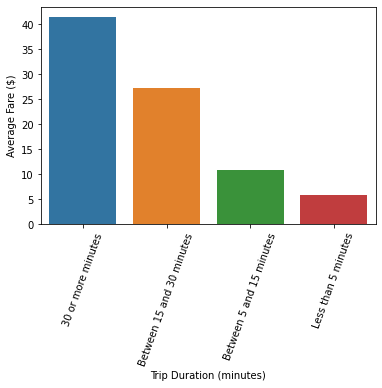

In [36]:
df_duration = df[['Duration Category','fare_dollars']]
df_duration_avg = df_duration.groupby('Duration Category',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Duration Category',y='fare_dollars',data=df_duration_avg)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=70)

**When it rained, what category of rain had the most users?**

<Axes: xlabel='Rain Category', ylabel='count'>

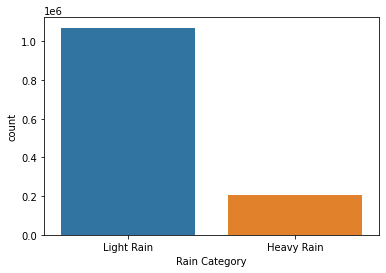

In [39]:
df_rain = df[df['Is Raining']==1]
sns.countplot(x='Rain Category',data=df_rain)

**What was the most common temperature range had on trips?**

Text(0.5, 1.0, 'Distribution of Temperature')

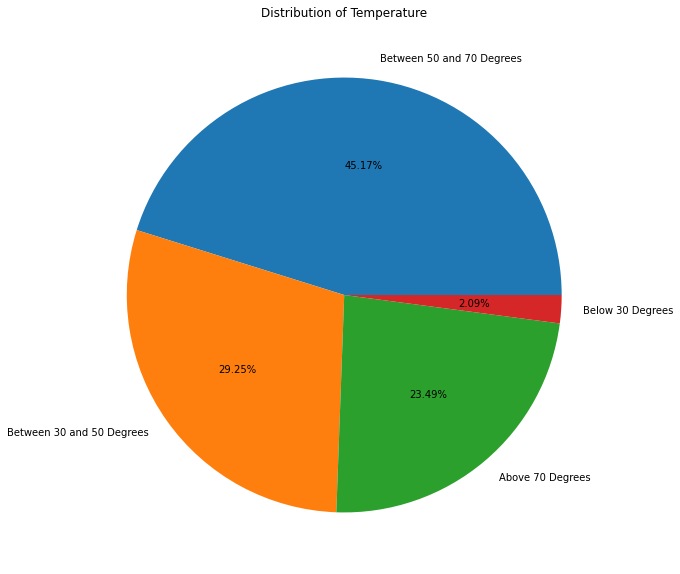

In [40]:
plt.figure(figsize=(10,10))
plt.pie(df['Temperature Range'].value_counts().values,labels=df['Temperature Range'].value_counts().index, autopct= '%1.2f%%')
plt.title("Distribution of Temperature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Above 70 Degrees'),
  Text(1, 0, 'Below 30 Degrees'),
  Text(2, 0, 'Between 30 and 50 Degrees'),
  Text(3, 0, 'Between 50 and 70 Degrees')])

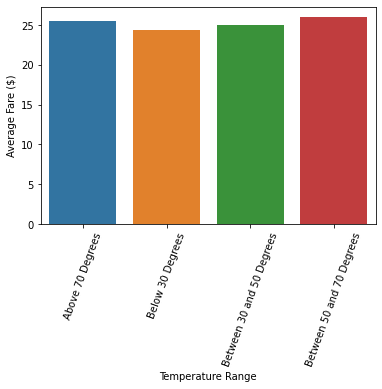

In [34]:
df_temperature = df[['Temperature Range','fare_dollars']]
df_temp_avg = df_temperature.groupby('Temperature Range',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Temperature Range',y='fare_dollars',data=df_temp_avg)
plt.xlabel('Temperature Range')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=70)

**Which year and month had highest average fare? Lowest?**

Text(0, 0.5, 'Average Fare ($)')

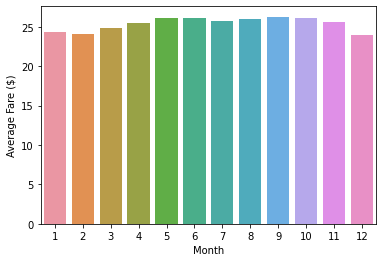

In [41]:
df_month = df[['month','fare_dollars']]
df_month_avg = df_month.groupby('month',as_index=False)['fare_dollars'].mean()
sns.barplot(x='month',y='fare_dollars',data=df_month_avg)
plt.xlabel('Month')
plt.ylabel('Average Fare ($)')


Text(0, 0.5, 'Average Fare ($)')

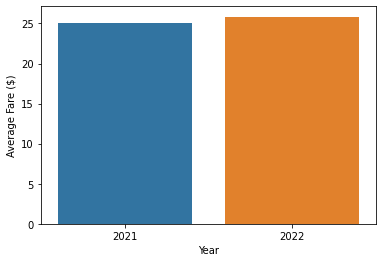

In [42]:
df_year = df[['year','fare_dollars']]
df_year_avg = df_year.groupby('year',as_index=False)['fare_dollars'].mean()
sns.barplot(x='year',y='fare_dollars',data=df_year_avg)
plt.xlabel('Year')
plt.ylabel('Average Fare ($)')

Text(0, 0.5, 'Average Fare ($)')

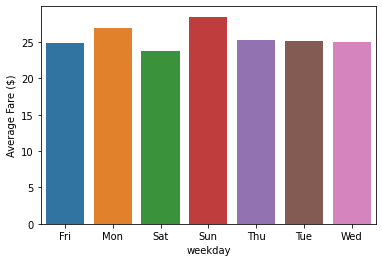

In [28]:
df_year = df[['weekday','fare_dollars']]
df_year_avg = df_year.groupby('weekday',as_index=False)['fare_dollars'].mean()
sns.barplot(x='weekday',y='fare_dollars',data=df_year_avg)
plt.xlabel('weekday')
plt.ylabel('Average Fare ($)')

**What holiday got the most rides?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Christmas'),
  Text(1, 0, 'Labor Day'),
  Text(2, 0, 'Memorial Day'),
  Text(3, 0, 'Halloween'),
  Text(4, 0, 'St Patricks Day'),
  Text(5, 0, 'Independence Day'),
  Text(6, 0, 'Martin Luther King Day'),
  Text(7, 0, 'Easter'),
  Text(8, 0, 'Thanksgiving'),
  Text(9, 0, 'New Years'),
  Text(10, 0, 'Valentines Day')])

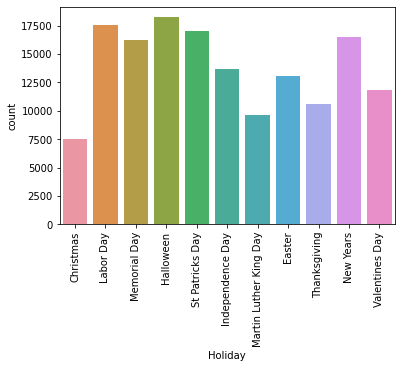

In [43]:
# Holidays that got the most rides
df_holiday = df[(df['Is Holiday']==1)]
sns.countplot(x='Holiday',data=df_holiday)
plt.xticks(rotation=90)

It is shown that Halloween, St Patrick's Day, and Labor Day got the most rides. It is understandable that Christmas got the least rides as most places are closed then and many are out of work.

**Total Money Earned From Users**

*2021-2022*

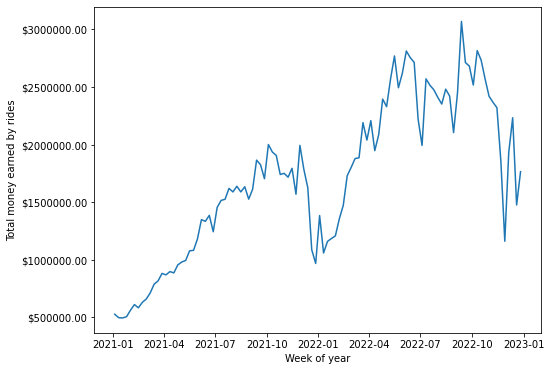

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
df_fare = df[['week_start_dt','fare_dollars']]
df_fare_avg = df_fare.groupby('week_start_dt',as_index=False)['fare_dollars'].sum()
plt.plot(df_fare_avg['week_start_dt'],df_fare_avg['fare_dollars'])
plt.xlabel('Week of year')
plt.ylabel('Total money earned by rides')
ax.yaxis.set_major_formatter('${x:1.2f}')

Looks like the amount of money earned peaked in October of 2022 and was the lowest at the beginning and end of the year (not counting beginning of 2021).

In [45]:
# 2021
df_2021 = df[df['year']==2021]
plt.figure(figsize=(8,8))
df_fare_2021 = df_2021[['weekday','fare_dollars']]
df_fare_avg_2021 = df_fare_2021.groupby('weekday',as_index=False)['fare_dollars'].sum()
df_fare_avg_2021 = df_fare_avg_2021.sort_values(by=['fare_dollars','weekday'])

<Figure size 576x576 with 0 Axes>

In [46]:
#2022
df_2022 = df[df['year']==2022]
plt.figure(figsize=(8,8))
df_fare_2022 = df_2022[['weekday','fare_dollars']]
df_fare_avg_2022 = df_fare_2022.groupby('weekday',as_index=False)['fare_dollars'].sum()
df_fare_avg_2022 = df_fare_avg_2022.sort_values(by=['fare_dollars','weekday'])

<Figure size 576x576 with 0 Axes>

In [47]:
df_fare_avg_2022

,weekday,fare_dollars
2,Sat,12984268.67
3,Sun,14286073.44
1,Mon,16685698.46
5,Tue,16688377.98
6,Wed,17069906.82
0,Fri,17309591.97
4,Thu,17424365.70


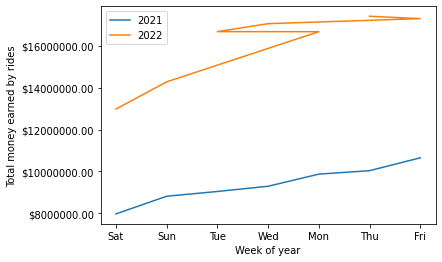

In [51]:
fig, ax = plt.subplots()
plt.plot(df_fare_avg_2021['weekday'],df_fare_avg_2021['fare_dollars'])
plt.plot(df_fare_avg_2022['weekday'],df_fare_avg_2022['fare_dollars'])
plt.xlabel('Week of year')
plt.legend(['2021','2022'])
plt.ylabel('Total money earned by rides')
ax.yaxis.set_major_formatter('${x:1.2f}')

**Average MPH Trend by week**

Text(0, 0.5, 'Average Cab Speed (MPH)')

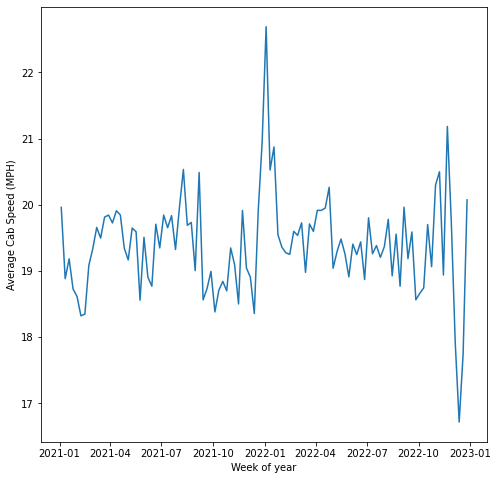

In [39]:
plt.figure(figsize=(8,8))
df_fare = df[['week_start_dt','mph']]
df_fare_avg = df_fare.groupby('week_start_dt',as_index=False)['mph'].mean()
plt.plot(df_fare_avg['week_start_dt'],df_fare_avg['mph'])
plt.xlabel('Week of year')
plt.ylabel('Average Cab Speed (MPH)')

**Average Distance Traveled Trend**

Text(0, 0.5, 'Average Trip Distance')

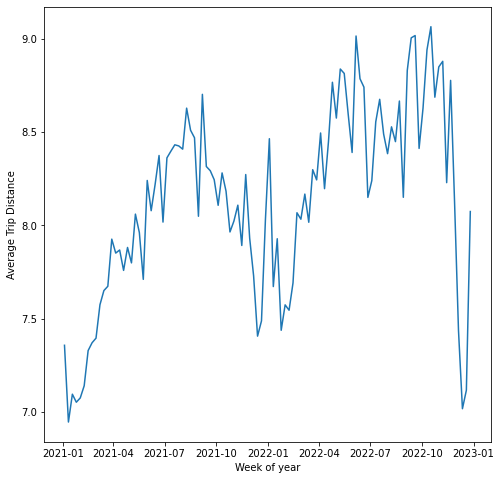

In [47]:
plt.figure(figsize=(8,8))
df_fare = df[['week_start_dt','trip_miles']]
df_fare_avg = df_fare.groupby('week_start_dt',as_index=False)['trip_miles'].mean()
plt.plot(df_fare_avg['week_start_dt'],df_fare_avg['trip_miles'])
plt.xlabel('Week of year')
plt.ylabel('Average Trip Distance')

**Average Distance By Hour of Day**

Text(0, 0.5, 'Average Trip Distance')

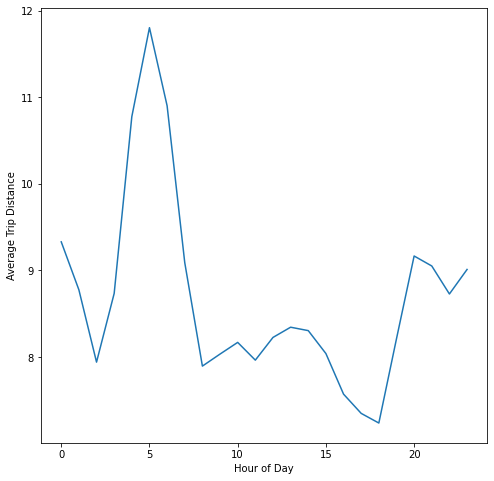

In [48]:
plt.figure(figsize=(8,8))
df_fare = df[['hour','trip_miles']]
df_fare_avg = df_fare.groupby('hour',as_index=False)['trip_miles'].mean()
plt.plot(df_fare_avg['hour'],df_fare_avg['trip_miles'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Distance')

**Average Speed by hour of day**

Text(0, 0.5, 'Average Cab Speed (MPH)')

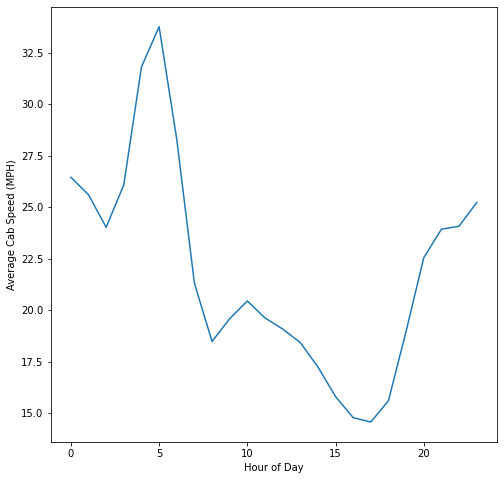

In [45]:
plt.figure(figsize=(8,8))
df_hour = df[['hour','mph']]
df_hour_avg = df_hour.groupby('hour',as_index=False)['mph'].mean()
plt.plot(df_hour_avg['hour'],df_hour_avg['mph'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Cab Speed (MPH)')

It can be obvious that the lowest speeds were at 5 pm and 7-8 am since those are typically rush hours

**Average Trip Duration by Hour of Day**

Text(0, 0.5, 'Average Trip Duration (minutes)')

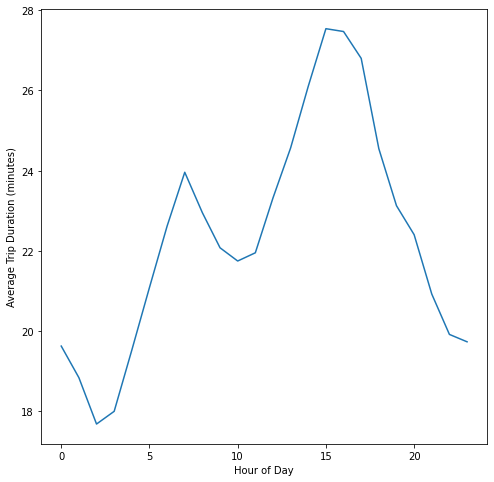

In [49]:
plt.figure(figsize=(8,8))
df_fare = df[['hour','trip_minutes']]
df_fare_avg = df_fare.groupby('hour',as_index=False)['trip_minutes'].mean()
plt.plot(df_fare_avg['hour'],df_fare_avg['trip_minutes'])
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration (minutes)')

It is understandable during Rush Hour that the trip duration will be a lot longer due to traffic.

**Average Trip Duration on Holidays**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Christmas'),
  Text(1, 0, 'Easter'),
  Text(2, 0, 'Halloween'),
  Text(3, 0, 'Independence Day'),
  Text(4, 0, 'Labor Day'),
  Text(5, 0, 'Martin Luther King Day'),
  Text(6, 0, 'Memorial Day'),
  Text(7, 0, 'New Years'),
  Text(8, 0, 'Not a Holiday'),
  Text(9, 0, 'St Patricks Day'),
  Text(10, 0, 'Thanksgiving'),
  Text(11, 0, 'Valentines Day')])

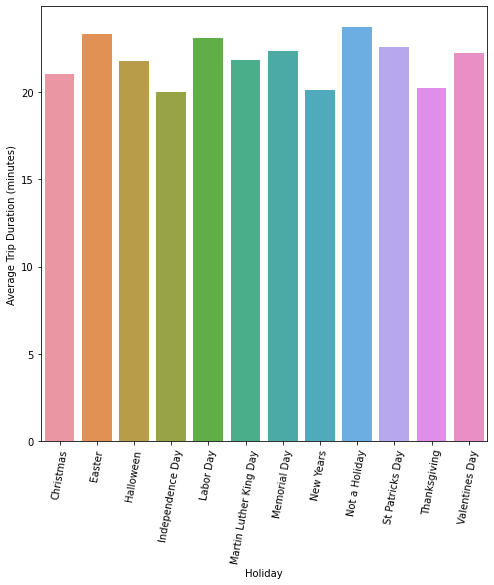

In [52]:
plt.figure(figsize=(8,8))
df_fare = df[['Holiday','trip_minutes']]
df_fare_avg = df_fare.groupby('Holiday',as_index=False)['trip_minutes'].mean()
sns.barplot(x='Holiday',y='trip_minutes',data=df_fare_avg)
plt.xlabel('Holiday')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=80)

**Average Trip MPH By Holiday**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Christmas'),
  Text(1, 0, 'Easter'),
  Text(2, 0, 'Halloween'),
  Text(3, 0, 'Independence Day'),
  Text(4, 0, 'Labor Day'),
  Text(5, 0, 'Martin Luther King Day'),
  Text(6, 0, 'Memorial Day'),
  Text(7, 0, 'New Years'),
  Text(8, 0, 'Not a Holiday'),
  Text(9, 0, 'St Patricks Day'),
  Text(10, 0, 'Thanksgiving'),
  Text(11, 0, 'Valentines Day')])

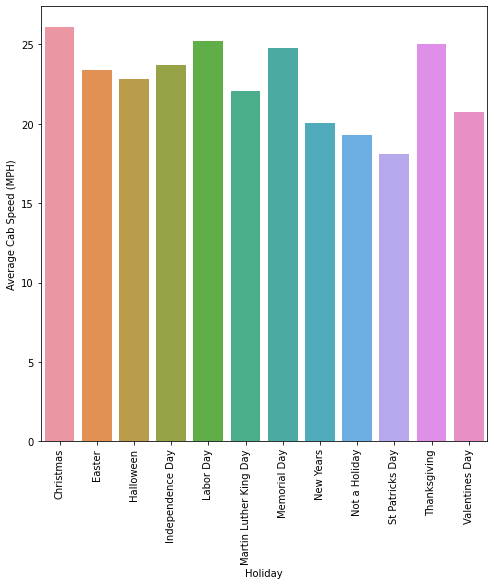

In [55]:
plt.figure(figsize=(8,8))
df_fare = df[['Holiday','mph']]
df_fare_avg = df_fare.groupby('Holiday',as_index=False)['mph'].mean()
sns.barplot(x='Holiday',y='mph',data=df_fare_avg)
plt.xlabel('Holiday')
plt.ylabel('Average Cab Speed (MPH)')
plt.xticks(rotation=90)

**Average Fare dollars by hour**

Text(0, 0.5, 'Average Fare ($)')

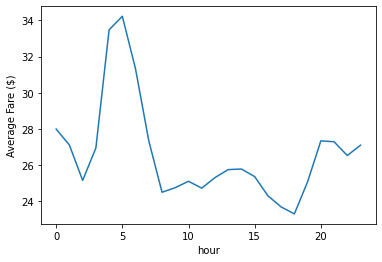

In [23]:
df_hour = df[['hour','fare_dollars']]
df_hour_avg = df_hour.groupby('hour',as_index=False)['fare_dollars'].mean()
plt.plot(df_hour_avg['hour'],df_hour_avg['fare_dollars'])
plt.xlabel('hour')
plt.ylabel('Average Fare ($)')

Based on the plot, it is interesting that there is somewhat an inverse relationship between hour of day and fare dollars along with hour of day and trip duration.

In [52]:
df_2021 = df_with_tips[df_with_tips['year']==2021]
df_hour_2021 = df_2021[['hour','fare_dollars']]
df_hour_avg_2021 = df_hour_2021.groupby('hour',as_index=False)['fare_dollars'].mean()

In [53]:
df_2022 = df_with_tips[df_with_tips['year']==2022]
df_hour_2022 = df_2022[['hour','fare_dollars']]
df_hour_avg_2022 = df_hour_2022.groupby('hour',as_index=False)['fare_dollars'].mean()

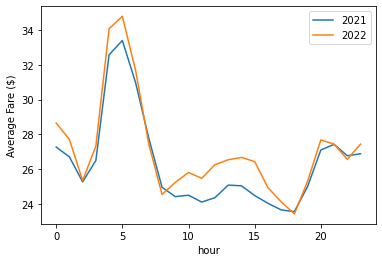

In [56]:
plt.plot(df_hour_avg_2021['hour'],df_hour_avg_2021['fare_dollars'])
plt.plot(df_hour_avg_2022['hour'],df_hour_avg_2022['fare_dollars'])
plt.xlabel('hour')
plt.ylabel('Average Fare ($)')
plt.legend(['2021','2022'])

**Does the day of the month have an impact on the fare dollars?**

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

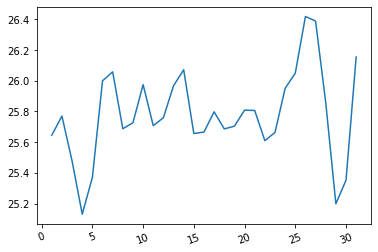

In [217]:
df_day = df_with_tips[['day','fare_dollars']]
df_day_avg = df_day.groupby('day',as_index=False)['fare_dollars'].mean()
plt.plot(df_day_avg['day'],df_day_avg['fare_dollars'])
plt.xticks(rotation=20)

Based on the above plot, it appears the days with the lowest average fare rates are close to the beginning of the month and around the end of the month (28th-29th).

**Does fare dollars increase in weather conditions such as snow, rainfall, or wind?**

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\330300035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Snow Day'] = df_fare['Is Snow Day'].astype('category')


Text(0, 0.5, 'Average Fare Dollars($)')

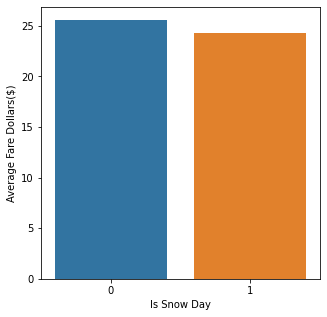

In [27]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Snow Day','fare_dollars']]
df_fare['Is Snow Day'] = df_fare['Is Snow Day'].astype('category')
df_fare_avg = df_fare.groupby('Is Snow Day',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Is Snow Day',y='fare_dollars',data=df_fare_avg)
plt.xlabel('Is Snow Day')
plt.ylabel('Average Fare Dollars($)')

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\3201479506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Snow Day'] = df_fare['Is Snow Day'].astype('category')


Text(0, 0.5, 'Average Trip Distance (mi)')

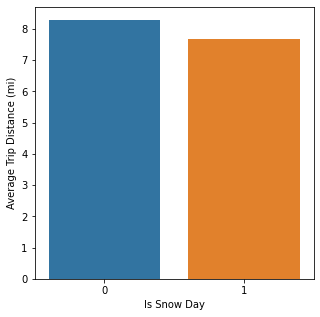

In [33]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Snow Day','trip_miles']]
df_fare['Is Snow Day'] = df_fare['Is Snow Day'].astype('category')
df_fare_avg = df_fare.groupby('Is Snow Day',as_index=False)['trip_miles'].mean()
sns.barplot(x='Is Snow Day',y='trip_miles',data=df_fare_avg)
plt.xlabel('Is Snow Day')
plt.ylabel('Average Trip Distance (mi)')

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\1493819064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Snow Day'] = df_fare['Is Snow Day'].astype('category')


Text(0, 0.5, 'Average Trip Minutes')

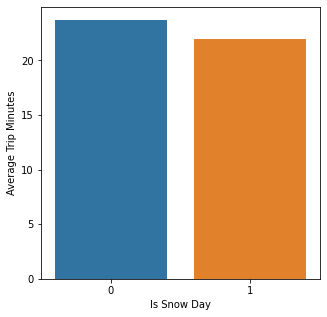

In [34]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Snow Day','trip_minutes']]
df_fare['Is Snow Day'] = df_fare['Is Snow Day'].astype('category')
df_fare_avg = df_fare.groupby('Is Snow Day',as_index=False)['trip_minutes'].mean()
sns.barplot(x='Is Snow Day',y='trip_minutes',data=df_fare_avg)
plt.xlabel('Is Snow Day')
plt.ylabel('Average Trip Minutes')

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\562947663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Snow Day'] = df_fare['Is Snow Day'].astype('category')


Text(0, 0.5, 'Average Taxi Speed (MPH)')

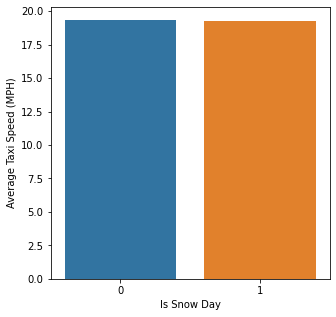

In [35]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Snow Day','mph']]
df_fare['Is Snow Day'] = df_fare['Is Snow Day'].astype('category')
df_fare_avg = df_fare.groupby('Is Snow Day',as_index=False)['mph'].mean()
sns.barplot(x='Is Snow Day',y='mph',data=df_fare_avg)
plt.xlabel('Is Snow Day')
plt.ylabel('Average Taxi Speed (MPH)')

Text(0, 0.5, 'Average Fare Dollars($)')

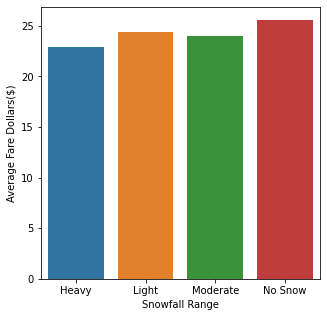

In [28]:
plt.figure(figsize=(5,5))
df_fare = df[['Snow Category','fare_dollars']]
df_fare_avg = df_fare.groupby('Snow Category',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Snow Category',y='fare_dollars',data=df_fare_avg)
plt.xlabel('Snowfall Range')
plt.ylabel('Average Fare Dollars($)')

Based on the 2 bar plots, it appears that the average fare is a little bit lower on snow days than on days when there isn't snow.

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\602242154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Raining'] = df_fare['Is Raining'].astype('category')


Text(0, 0.5, 'Average Fare Dollars($)')

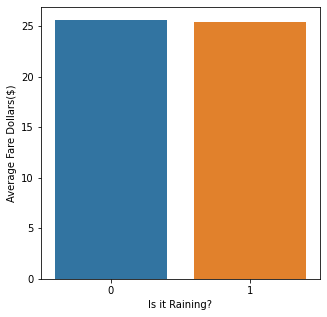

In [29]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Raining','fare_dollars']]
df_fare['Is Raining'] = df_fare['Is Raining'].astype('category')
df_fare_avg = df_fare.groupby('Is Raining',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Is Raining',y='fare_dollars',data=df_fare_avg)
plt.xlabel('Is it Raining?')
plt.ylabel('Average Fare Dollars($)')

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\2533930265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Raining'] = df_fare['Is Raining'].astype('category')


Text(0, 0.5, 'Average Trip Distance (mi)')

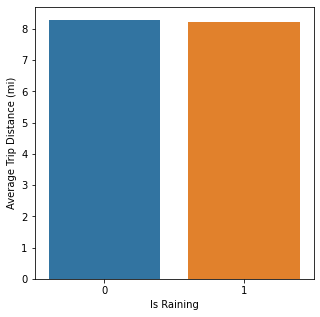

In [36]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Raining','trip_miles']]
df_fare['Is Raining'] = df_fare['Is Raining'].astype('category')
df_fare_avg = df_fare.groupby('Is Raining',as_index=False)['trip_miles'].mean()
sns.barplot(x='Is Raining',y='trip_miles',data=df_fare_avg)
plt.xlabel('Is Raining')
plt.ylabel('Average Trip Distance (mi)')

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\3196067778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Raining'] = df_fare['Is Raining'].astype('category')


Text(0, 0.5, 'Average Taxi Speed (mph)')

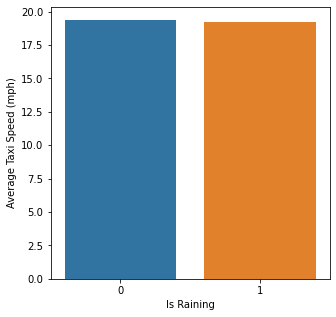

In [37]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Raining','mph']]
df_fare['Is Raining'] = df_fare['Is Raining'].astype('category')
df_fare_avg = df_fare.groupby('Is Raining',as_index=False)['mph'].mean()
sns.barplot(x='Is Raining',y='mph',data=df_fare_avg)
plt.xlabel('Is Raining')
plt.ylabel('Average Taxi Speed (mph)')

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\3092437024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Raining'] = df_fare['Is Raining'].astype('category')


Text(0, 0.5, 'Average Trip Duration (minutes)')

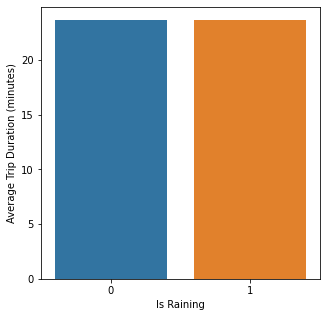

In [39]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Raining','trip_minutes']]
df_fare['Is Raining'] = df_fare['Is Raining'].astype('category')
df_fare_avg = df_fare.groupby('Is Raining',as_index=False)['trip_minutes'].mean()
sns.barplot(x='Is Raining',y='trip_minutes',data=df_fare_avg)
plt.xlabel('Is Raining')
plt.ylabel('Average Trip Duration (minutes)')

Text(0, 0.5, 'Average Fare Dollars($)')

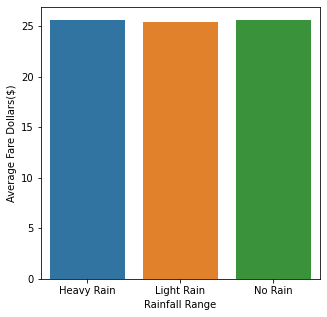

In [30]:
plt.figure(figsize=(5,5))
df_fare = df[['Rain Category','fare_dollars']]
df_fare_avg = df_fare.groupby('Rain Category',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Rain Category',y='fare_dollars',data=df_fare_avg)
plt.xlabel('Rainfall Range')
plt.ylabel('Average Fare Dollars($)')

There is not much of a significant difference between rainfall and taxi trip fare.

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\3401885878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Windy (Gust)'] = df_fare['Is Windy (Gust)'].astype('category')


Text(0, 0.5, 'Average Fare Dollars($)')

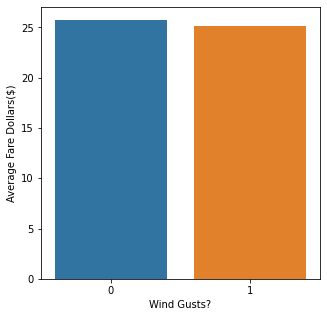

In [31]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Windy (Gust)','fare_dollars']]
df_fare['Is Windy (Gust)'] = df_fare['Is Windy (Gust)'].astype('category')
df_fare_avg = df_fare.groupby('Is Windy (Gust)',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Is Windy (Gust)',y='fare_dollars',data=df_fare_avg)
plt.xlabel('Wind Gusts?')
plt.ylabel('Average Fare Dollars($)')

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_10412\2441102902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fare['Is Windy (Speed)'] = df_fare['Is Windy (Speed)'].astype('category')


Text(0, 0.5, 'Average Fare Dollars($)')

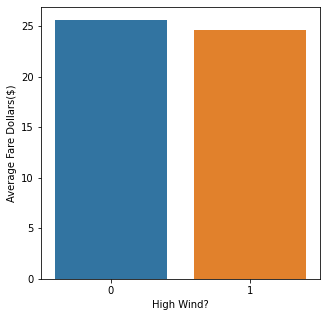

In [32]:
plt.figure(figsize=(5,5))
df_fare = df[['Is Windy (Speed)','fare_dollars']]
df_fare['Is Windy (Speed)'] = df_fare['Is Windy (Speed)'].astype('category')
df_fare_avg = df_fare.groupby('Is Windy (Speed)',as_index=False)['fare_dollars'].mean()
sns.barplot(x='Is Windy (Speed)',y='fare_dollars',data=df_fare_avg)
plt.xlabel('High Wind?')
plt.ylabel('Average Fare Dollars($)')

When there is higher wind speeds, it does appear that the average taxi fare rate is a tiny bit lower.

**Which are the most popular companies**

Text(0.5, 1.0, 'Most Popular Cab Companies in Chicago')

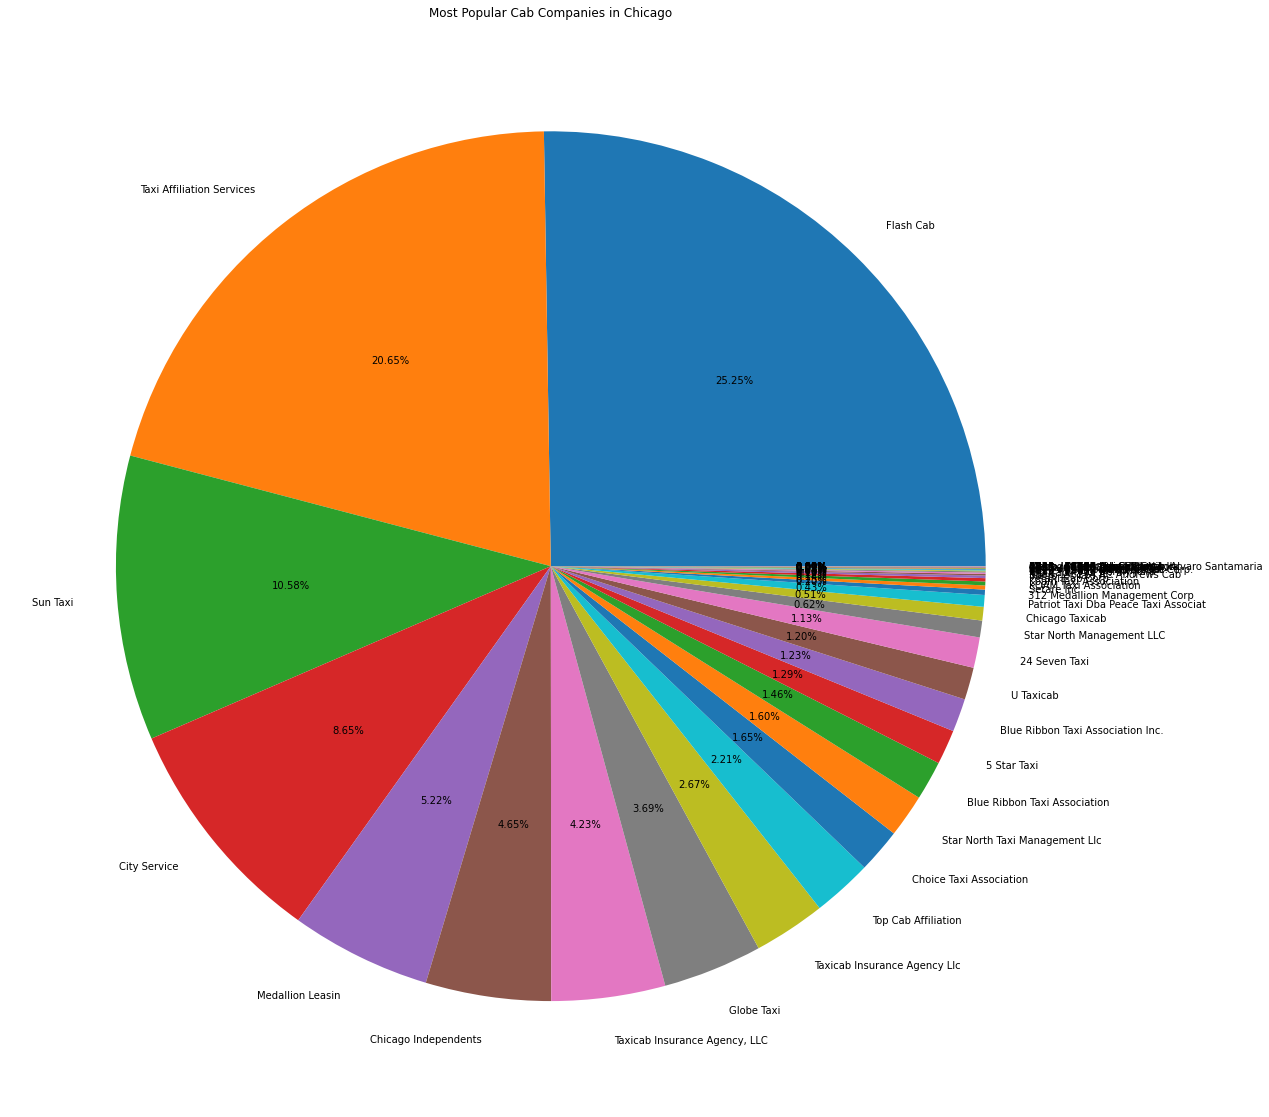

In [47]:
plt.figure(figsize=(20,20))
plt.pie(df['company'].value_counts().values,labels=df['company'].value_counts().index, autopct= '%1.2f%%')
plt.title("Most Popular Cab Companies in Chicago")

**What are the top pickup locations?**

Text(0.5, 1.0, 'Most Popular Cab Pick Up Locations in Chicago')

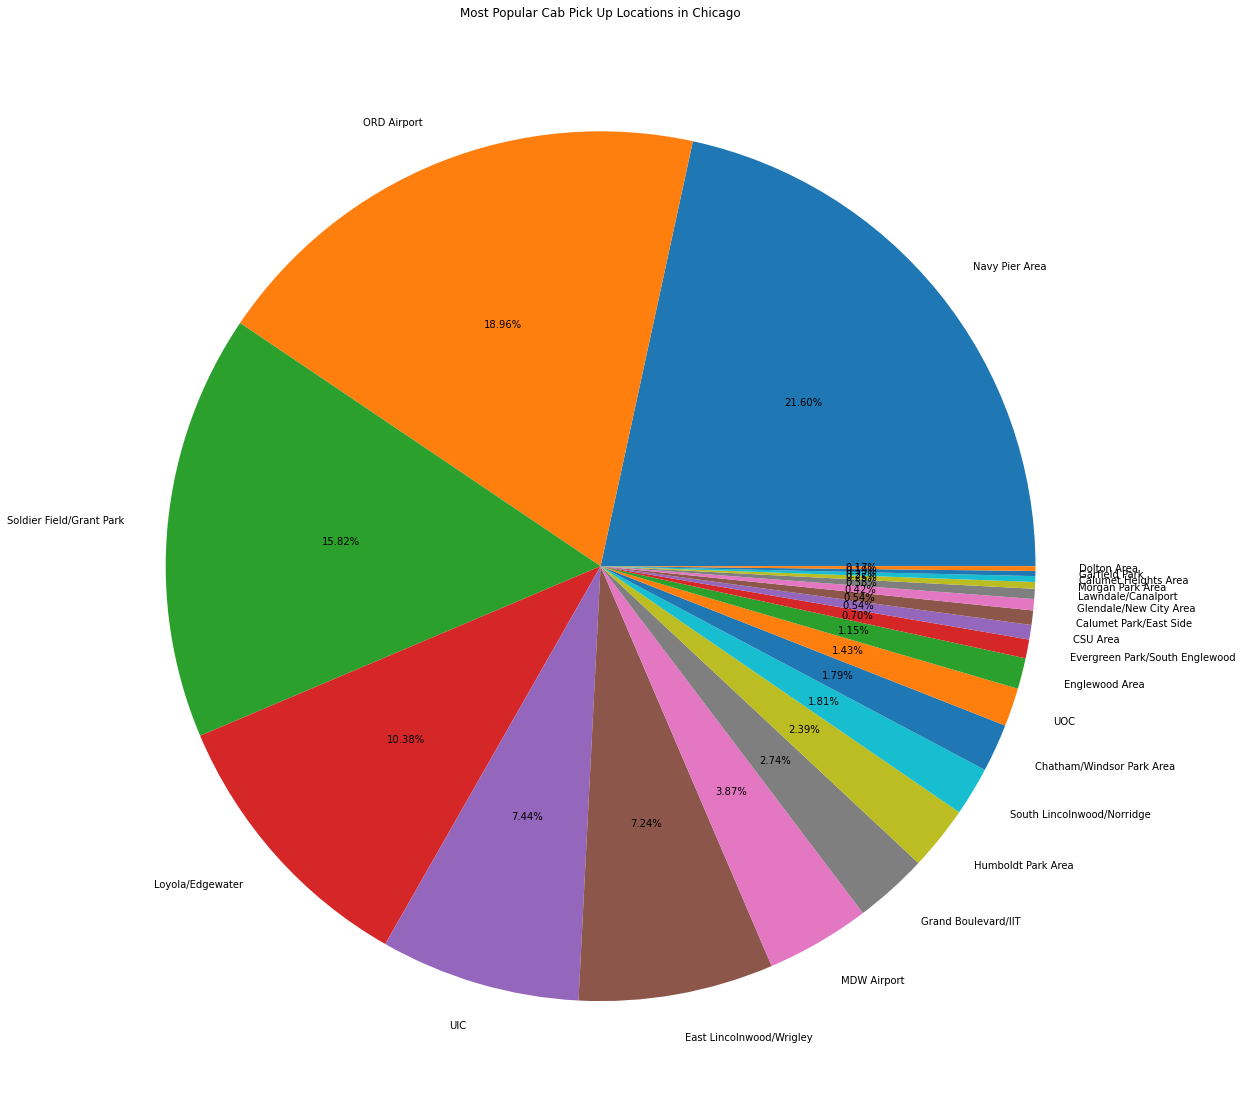

In [48]:
#Top Pickup Locations
plt.figure(figsize=(20,20))
plt.pie(df_with_tips['pick_up_area'].value_counts().values,labels=df_with_tips['pick_up_area'].value_counts().index, autopct= '%1.2f%%')
plt.title("Most Popular Cab Pick Up Locations in Chicago")

**What are the top dropoff locations?**

Text(0.5, 1.0, 'Top Dropoff Locations')

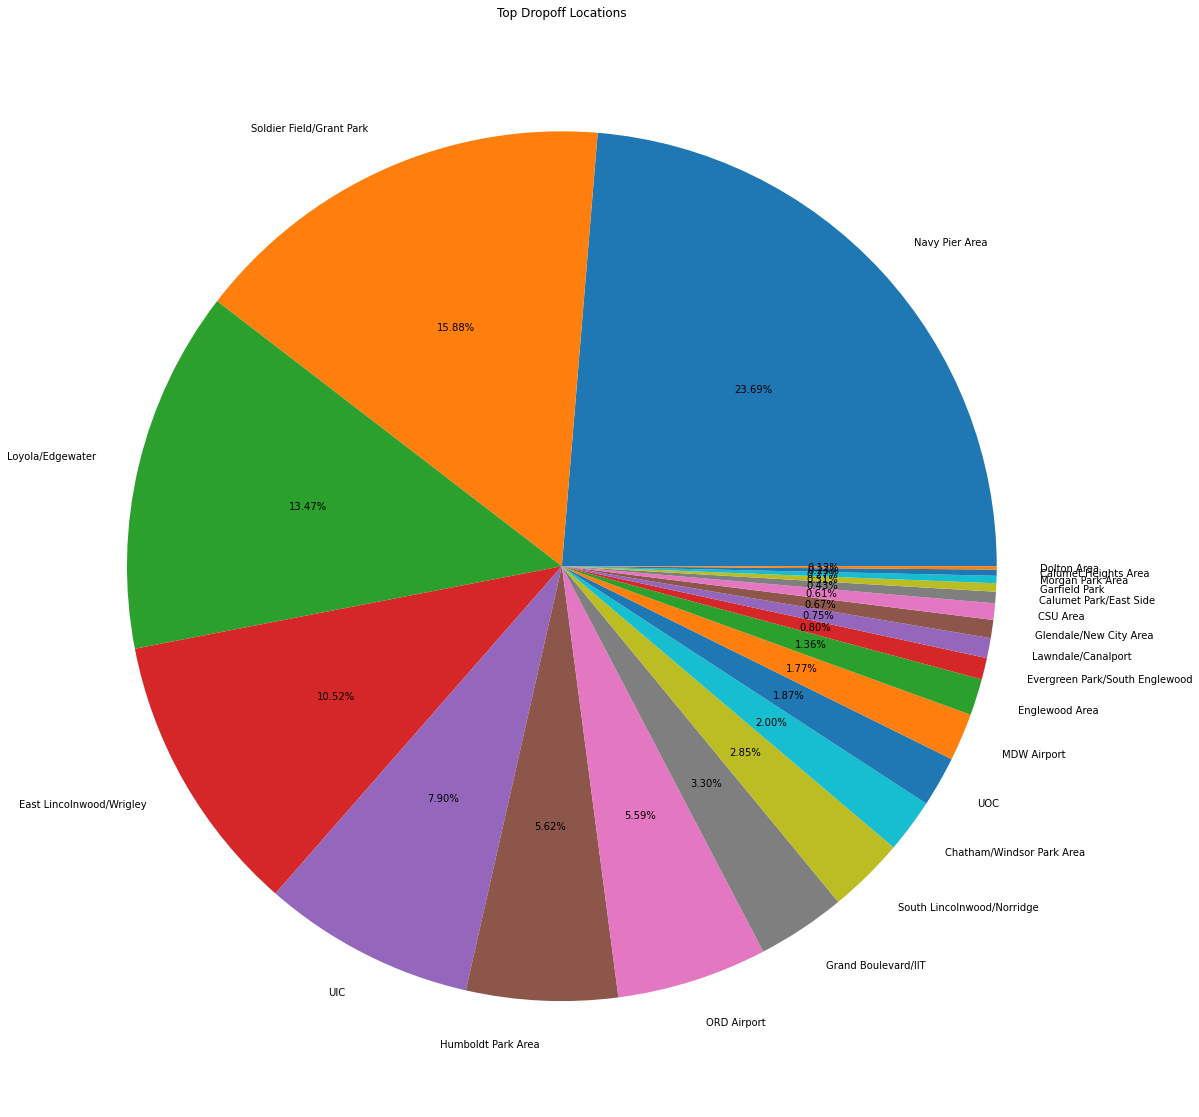

In [44]:
plt.figure(figsize=(20,20))
plt.pie(df_with_tips['dropoff_area'].value_counts().values,labels=df_with_tips['dropoff_area'].value_counts().index, autopct= '%1.2f%%')
plt.title("Top Dropoff Locations")

It appears that the most common dropoff area is Navy Pier or Soldier Field as they are in the central area or 'Chicago Loop' which is one of the most popular areas in Chicago for tourists and residents.

**Does Pickup or Dropoff Location Have an Effect on Fare?**

In [18]:
df_location = df_with_tips[['pick_up_area','fare_dollars']]
df_location_avg = df_location.groupby('pick_up_area')['fare_dollars'].mean()
df_pickup = df_location_avg.to_frame()
df_pickup = df_pickup.sort_values(by=['fare_dollars'])
df_pickup

,fare_dollars
pick_up_area,
UIC,17.086136
Navy Pier Area,17.121757
Soldier Field/Grant Park,18.711817
East Lincolnwood/Wrigley,20.334128
Humboldt Park Area,22.492147
Grand Boulevard/IIT,24.423466
South Lincolnwood/Norridge,24.663644
UOC,24.802672
Glendale/New City Area,25.134258


As expected, people getting picked up at O'Hare especially get the highest fare as there is an airfare tax for taxi departures which is around $5. It also makes sense for people who are getting picked up from Navy Pier or Soldier Field area to get a lower fare as the central area is more popular for people and the trip distances are not far and usually have a lot more services surrounding that region.

In [55]:
df_location = df_with_tips[['dropoff_area','fare_dollars']]
df_location_avg = df_location.groupby('dropoff_area')['fare_dollars'].mean()
df_dropoff = df_location_avg.to_frame()
df_dropoff = df_dropoff.sort_values(by=['fare_dollars'])
df_dropoff

,fare_dollars
dropoff_area,
UIC,18.997945
Navy Pier Area,21.684102
Soldier Field/Grant Park,22.396544
Humboldt Park Area,23.456045
East Lincolnwood/Wrigley,23.648338
South Lincolnwood/Norridge,24.868464
Grand Boulevard/IIT,25.122850
Lawndale/Canalport,25.186058
Glendale/New City Area,25.248323


**Is there a significant difference in population means of fare for people who got picked up at the airport vs not?**

In [21]:
mu1 = df_with_tips[(df_with_tips['Pickup at Airport']==1)]
mu2 = df_with_tips[(df_with_tips['Pickup at Airport']==0)]

In [32]:
sample_1 = mu1['fare_dollars'].mean()
sample_2 = mu2['fare_dollars'].mean()
print(sample_1)
print(sample_2)

39.4287525087918
21.734124669350457


In [34]:
_,p_value = ttest_ind(sample_1.values,sample_2.values)
print(p_value)

0.0


There is a big difference in the fare rate for rides that were picked up at an airport

**What companies made the most money?**

Text(0, 0.5, 'company')

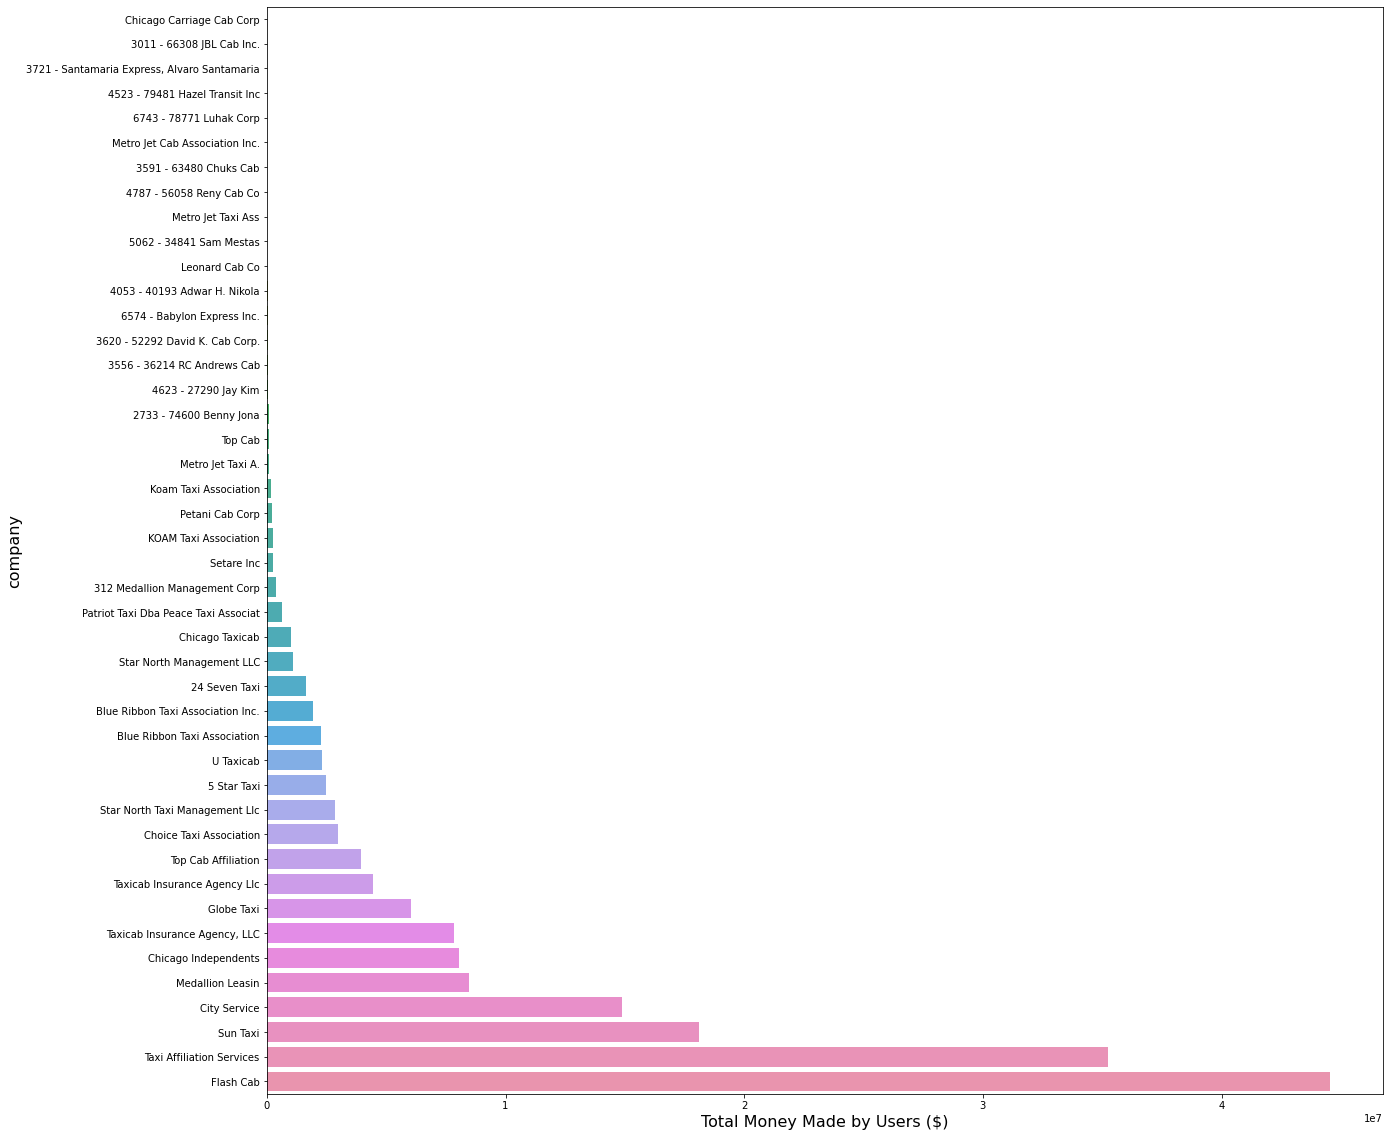

In [68]:
plt.figure(figsize = (20,20))
df_company = df_with_tips[['company','fare_dollars']]
df_company_sum = df_company.groupby('company',as_index=False)['fare_dollars'].sum()
df_company_sum = df_company_sum.sort_values(by=['fare_dollars'])
sns.barplot(y='company',x='fare_dollars',data=df_company_sum)
plt.xlabel('Total Money Made by Users ($)',fontsize=16)
plt.ylabel('company',fontsize=16)

**What are the most and least expensive companies?**

Text(0, 0.5, 'Company')

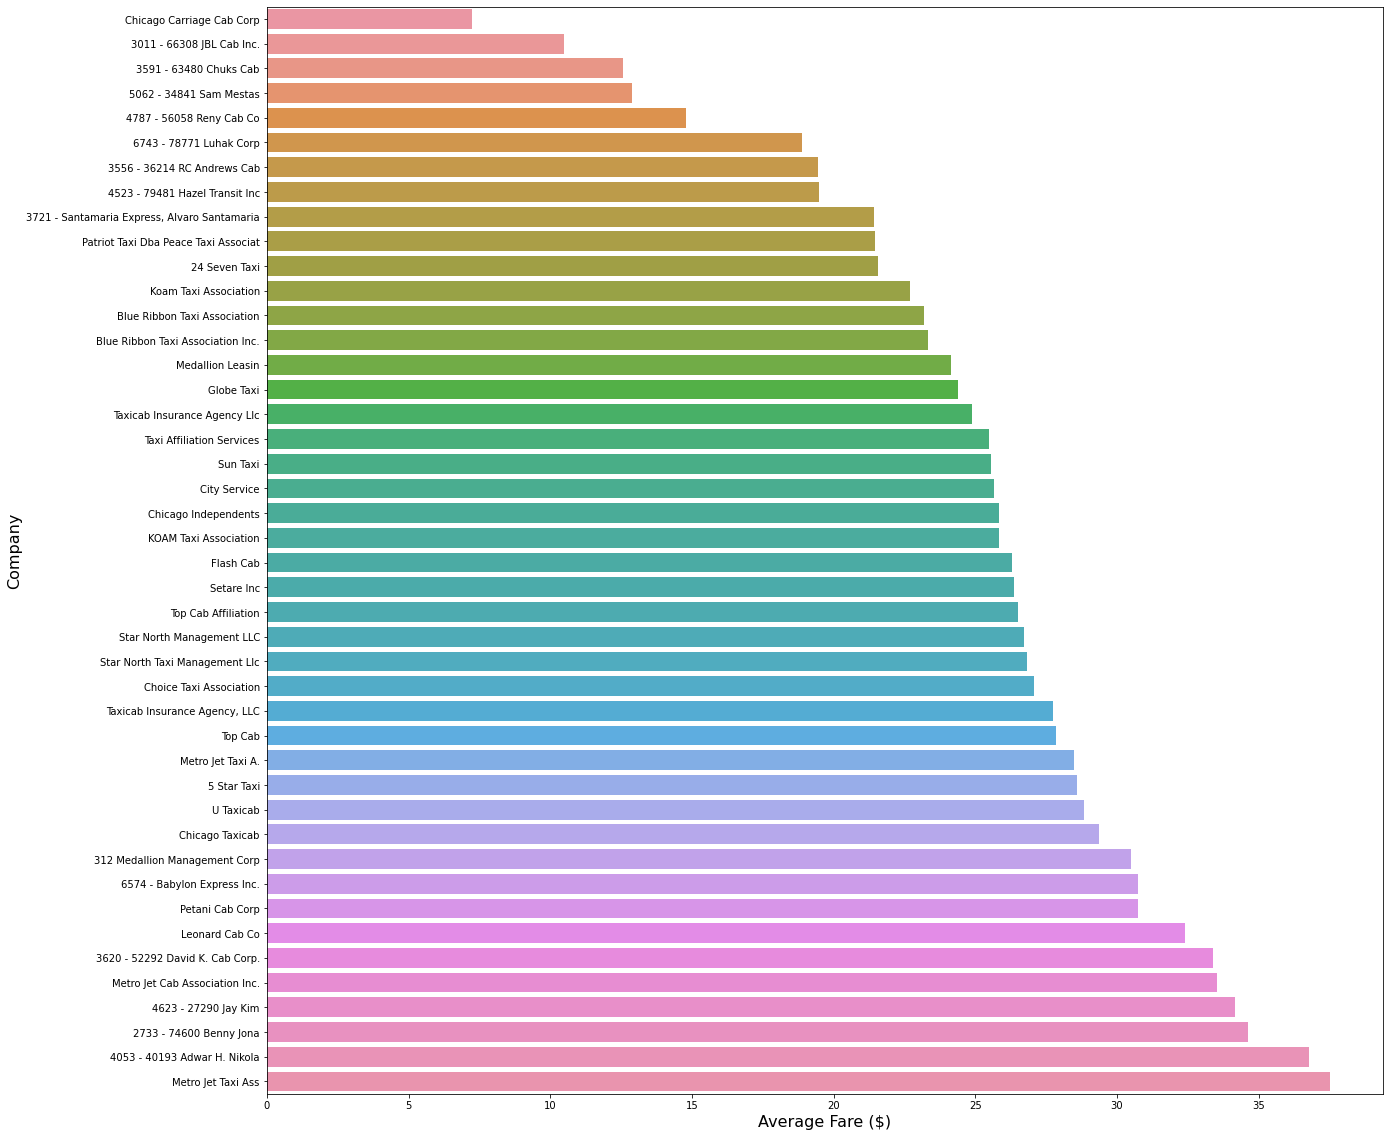

In [66]:
plt.figure(figsize=(20,20))
df_company = df_with_tips[['company','fare_dollars']]
df_company_avg = df_company.groupby('company',as_index=False)['fare_dollars'].mean()
df_company_avg = df_company_avg.sort_values(by=['fare_dollars'])
sns.barplot(y='company',x='fare_dollars',data=df_company_avg)
plt.xlabel('Average Fare ($)',fontsize=16)
plt.ylabel('Company',fontsize=16)
#df_avg_fare_company = df_company.groupby(['company'])['fare_dollars'].sort_values(by=['fare_dollars']).mean()

**What are the most expensive companies by cost per mile?**

In [56]:
df_cost = pd.read_csv("C://Users//JCCLI//Downloads//Chicago_Taxi_Final_Model.csv", \
                usecols = ('fare_dollars','company','cost_per_mile','month','day','mph','hour','weekday','trip_miles','trip_minutes'))

<AxesSubplot:xlabel='trip_miles'>

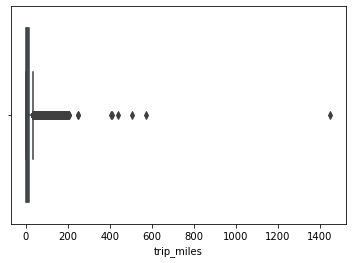

In [31]:
sns.boxplot(x='trip_miles',data=df_cost)

In [58]:
df_cleaned = df_cost[(df_cost.fare_dollars < 150)\
                & (df_cost.trip_minutes>0) & (df_cost.trip_minutes < 90) & (df_cost.mph < 100) & (df_cost.trip_miles < 50)\
                     & (df_cost.cost_per_mile < 300)
               ]

In [57]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376865 entries, 0 to 4376864
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trip_miles     float64
 1   company        object 
 2   fare_dollars   float64
 3   trip_minutes   int64  
 4   month          int64  
 5   day            int64  
 6   hour           int64  
 7   weekday        object 
 8   cost_per_mile  float64
 9   mph            float64
dtypes: float64(4), int64(4), object(2)
memory usage: 333.9+ MB


<AxesSubplot:xlabel='cost_per_mile'>

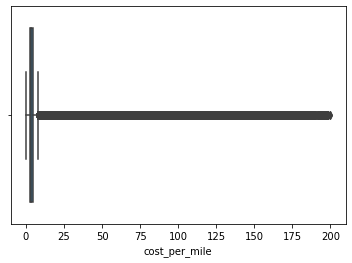

In [50]:
sns.boxplot(x='cost_per_mile',data=df_cleaned)

In [38]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4341175 entries, 0 to 4376864
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trip_miles     float64
 1   company        object 
 2   fare_dollars   float64
 3   trip_minutes   int64  
 4   month          int64  
 5   day            int64  
 6   hour           int64  
 7   weekday        object 
 8   cost_per_mile  float64
 9   mph            float64
dtypes: float64(4), int64(4), object(2)
memory usage: 364.3+ MB


In [59]:
plt.figure(figsize=(20,20))
df_company = df_cleaned[['company','cost_per_mile']]
df_company_avg = df_company.groupby('company',as_index=False)['cost_per_mile'].mean()
df_company_avg = df_company_avg.sort_values(by=['cost_per_mile'])
#sns.barplot(y='company',x='cost_per_mile',data=df_company_avg)
#plt.xlabel('Average Fare per mile ($)',fontsize=16)
#plt.ylabel('Company',fontsize=16)
df_company_avg

,company,cost_per_mile
5,4053 - 40193 Adwar H. Nikola,2.889375
1,2733 - 74600 Benny Jona,3.213843
22,Leonard Cab Co,3.218389
6,4623 - 27290 Jay Kim,3.299134
4,3620 - 52292 David K. Cab Corp.,3.331170
26,Petani Cab Corp,3.332604
2,312 Medallion Management Corp,3.455387
3,3556 - 36214 RC Andrews Cab,3.474718
27,Setare Inc,3.542835
10,6574 - Babylon Express Inc.,3.554253


<Figure size 1440x1440 with 0 Axes>

**What are the slowest and fastest companies?**

Text(0, 0.5, 'Company')

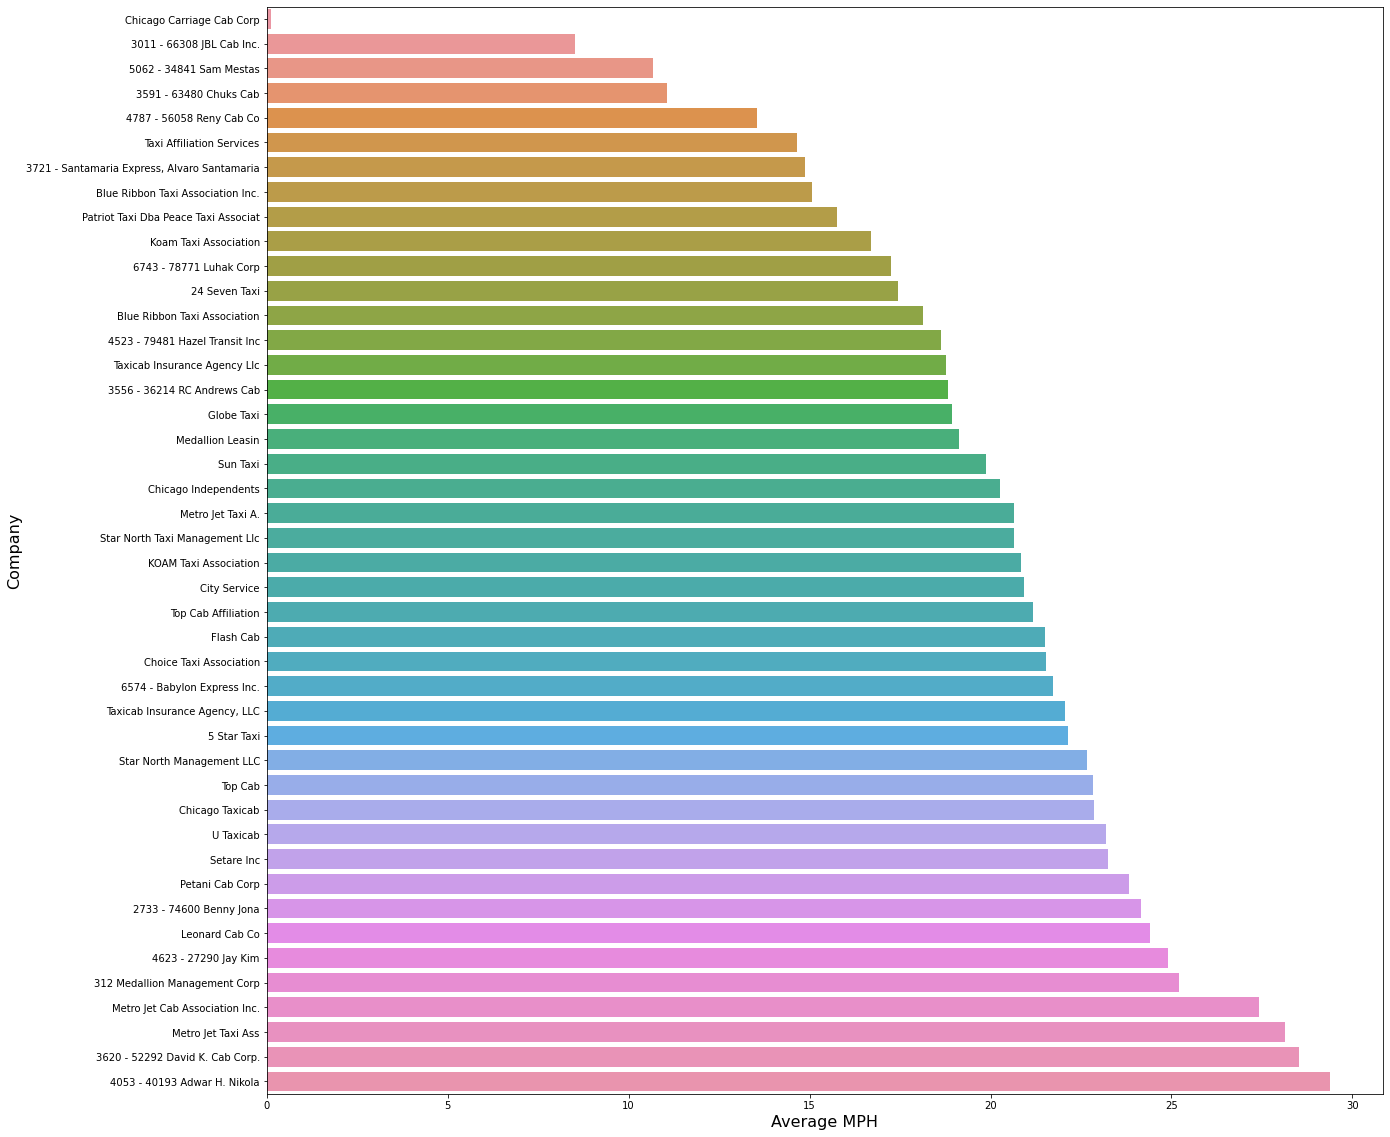

In [19]:
plt.figure(figsize=(20,20))
df_company = df_with_tips[['company','mph']]
df_company_avg = df_company.groupby('company',as_index=False)['mph'].mean()
df_company_avg = df_company_avg.sort_values(by=['mph'])
sns.barplot(y='company',x='mph',data=df_company_avg)
plt.xlabel('Average MPH',fontsize=16)
plt.ylabel('Company',fontsize=16)

**Slowest and fastest companies by trip duration (minutes)**

Text(0, 0.5, 'Taxi Company')

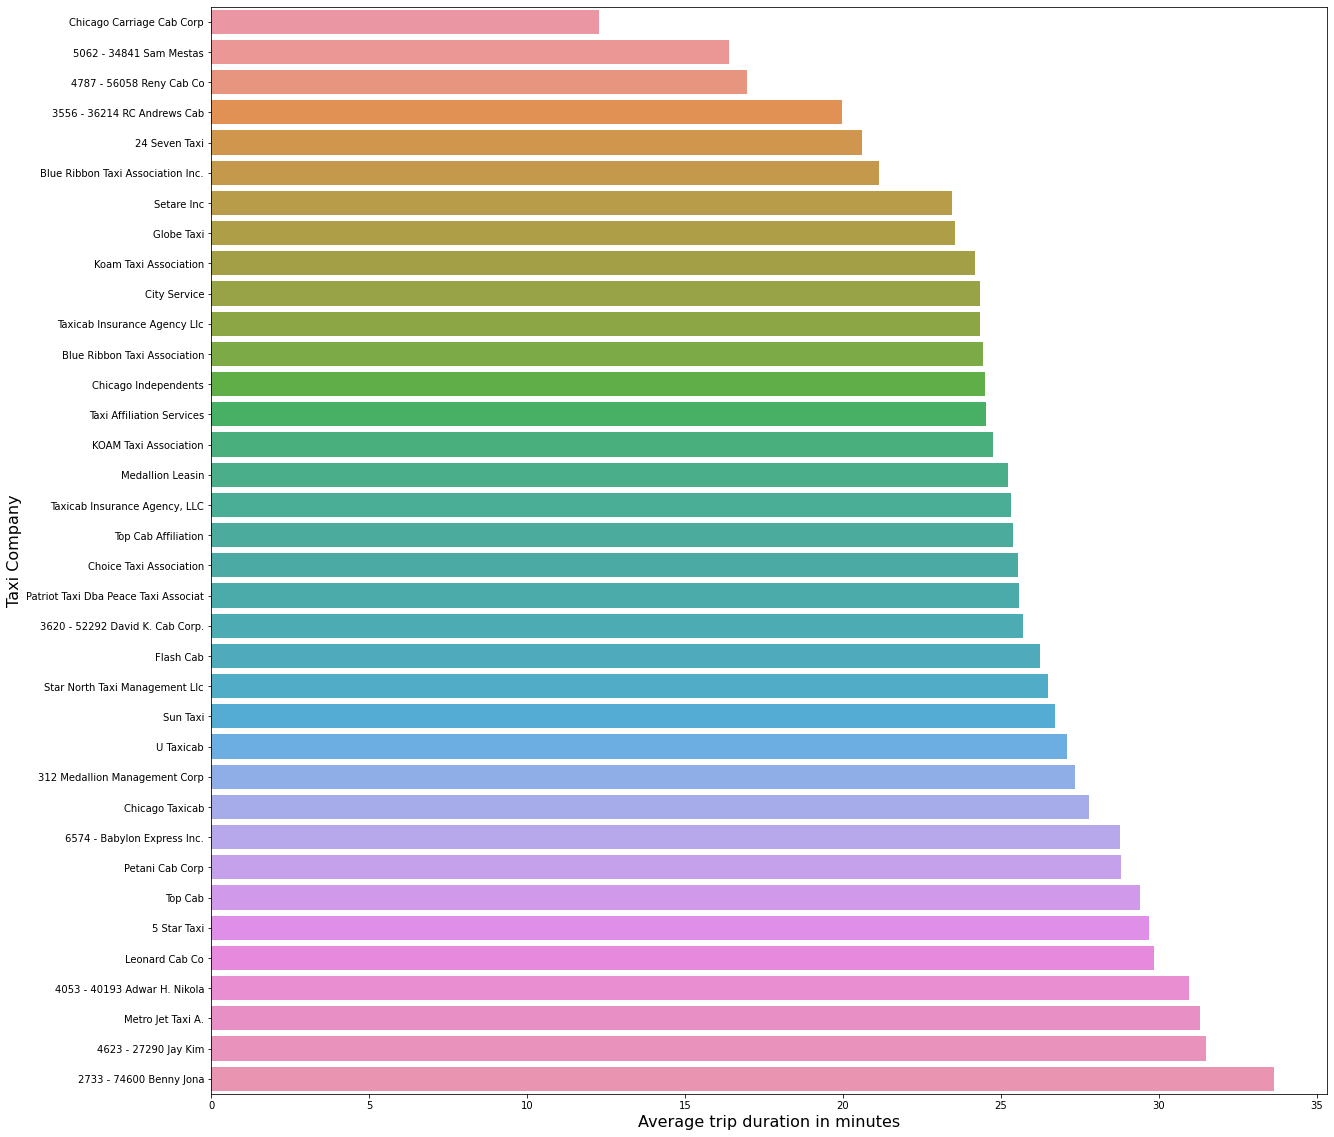

In [13]:
plt.figure(figsize=(20,20))
df_company = df_new_full[['company','trip_minutes_actual']]
df_company_avg = df_company.groupby('company',as_index=False)['trip_minutes_actual'].mean()
df_company_avg = df_company_avg.sort_values(by=['trip_minutes_actual'])
sns.barplot(y='company',x='trip_minutes_actual',data=df_company_avg)
plt.xlabel('Average trip duration in minutes',fontsize=16)
plt.ylabel('Taxi Company',fontsize=16)

**What pickup areas have the slowest and fastest taxi speeds? Certain speed limits and other issues could impact trip miles and trip minutes**

Text(0, 0.5, 'Pickup Area')

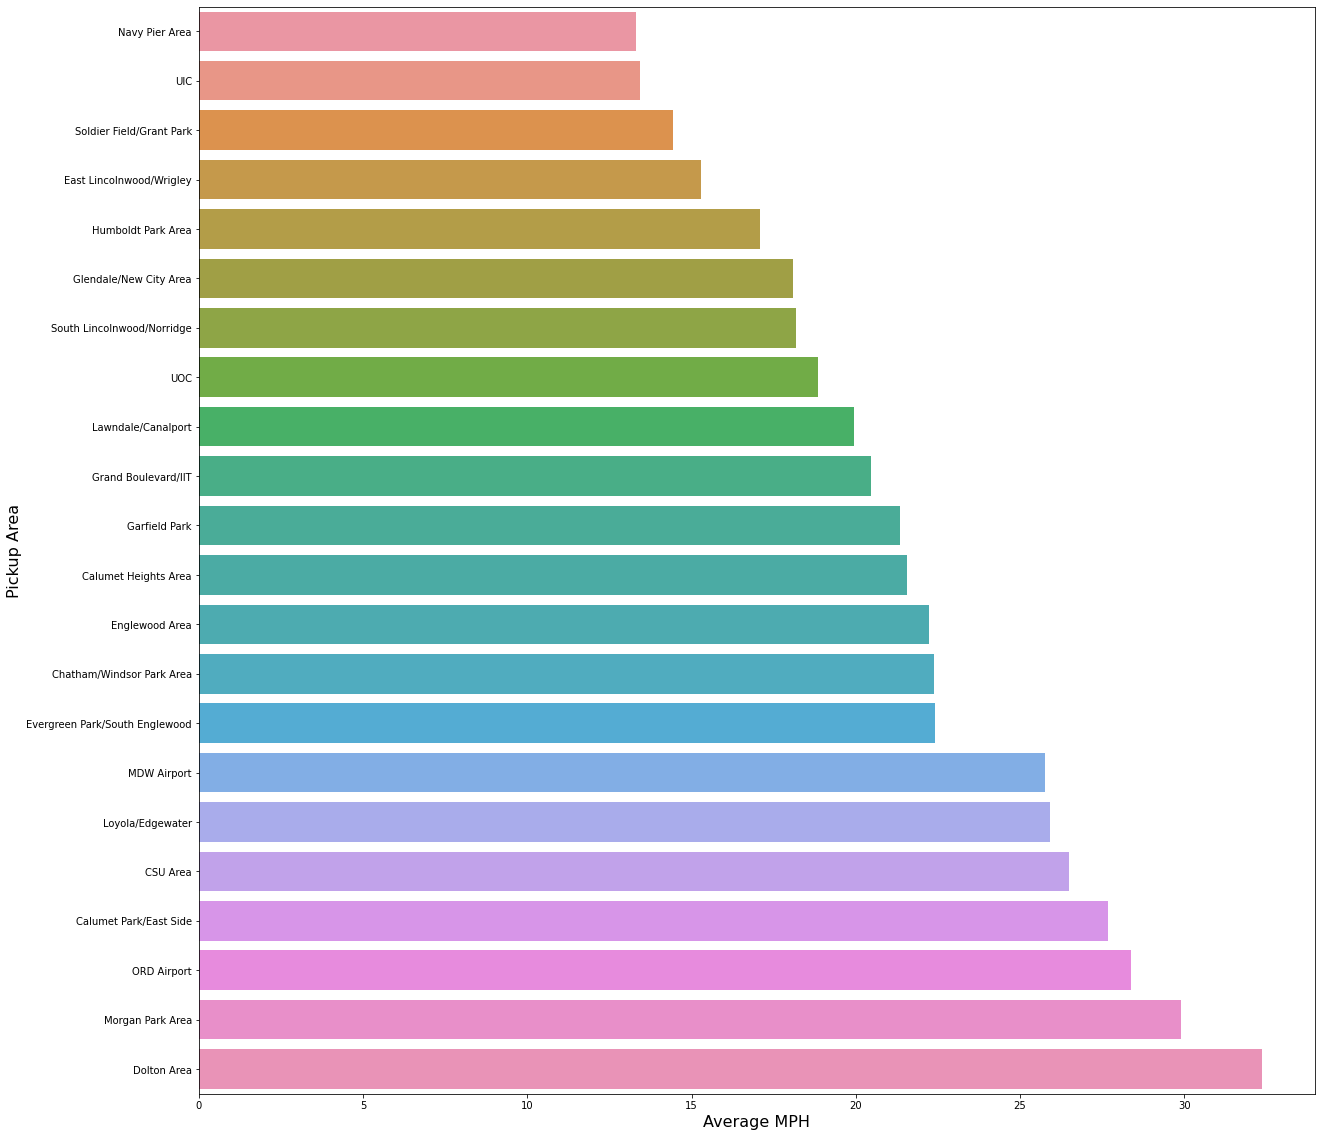

In [60]:
plt.figure(figsize=(20,20))
df_company = df_with_tips[['pick_up_area','mph']]
df_company_avg = df_company.groupby('pick_up_area',as_index=False)['mph'].mean()
df_company_avg = df_company_avg.sort_values(by=['mph'])
sns.barplot(y='pick_up_area',x='mph',data=df_company_avg)
plt.xlabel('Average MPH',fontsize=16)
plt.ylabel('Pickup Area',fontsize=16)

Based on the plot, it is understanding that Navy Pier, and Soldier Field areas would get some of the slowest taxi speeds as they tend to be some of the most popular tourist spots in Chicago and have lots of traffic.

**What were the average trip durations from pickup areas?**

Text(0, 0.5, 'Pickup Area')

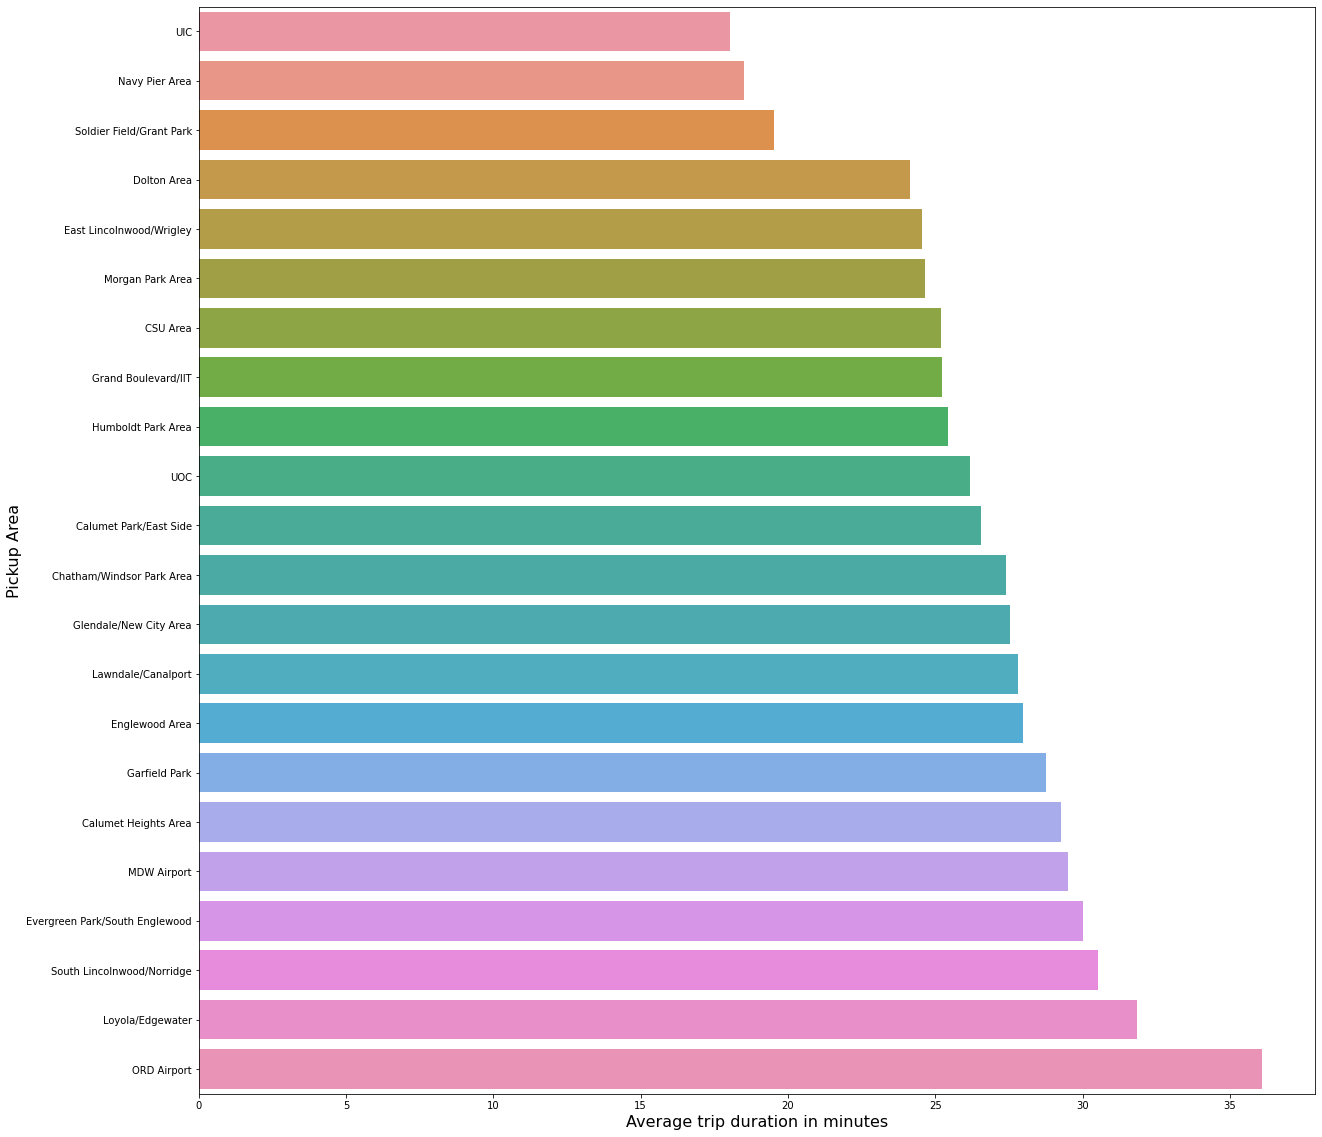

In [12]:
plt.figure(figsize=(20,20))
df_company = df_new_full[['pick_up_area','trip_minutes_actual']]
df_company_avg = df_company.groupby('pick_up_area',as_index=False)['trip_minutes_actual'].mean()
df_company_avg = df_company_avg.sort_values(by=['trip_minutes_actual'])
sns.barplot(y='pick_up_area',x='trip_minutes_actual',data=df_company_avg)
plt.xlabel('Average trip duration in minutes',fontsize=16)
plt.ylabel('Pickup Area',fontsize=16)

**When at the airport, what companies charge the highest fare?**

Text(0, 0.5, 'Company')

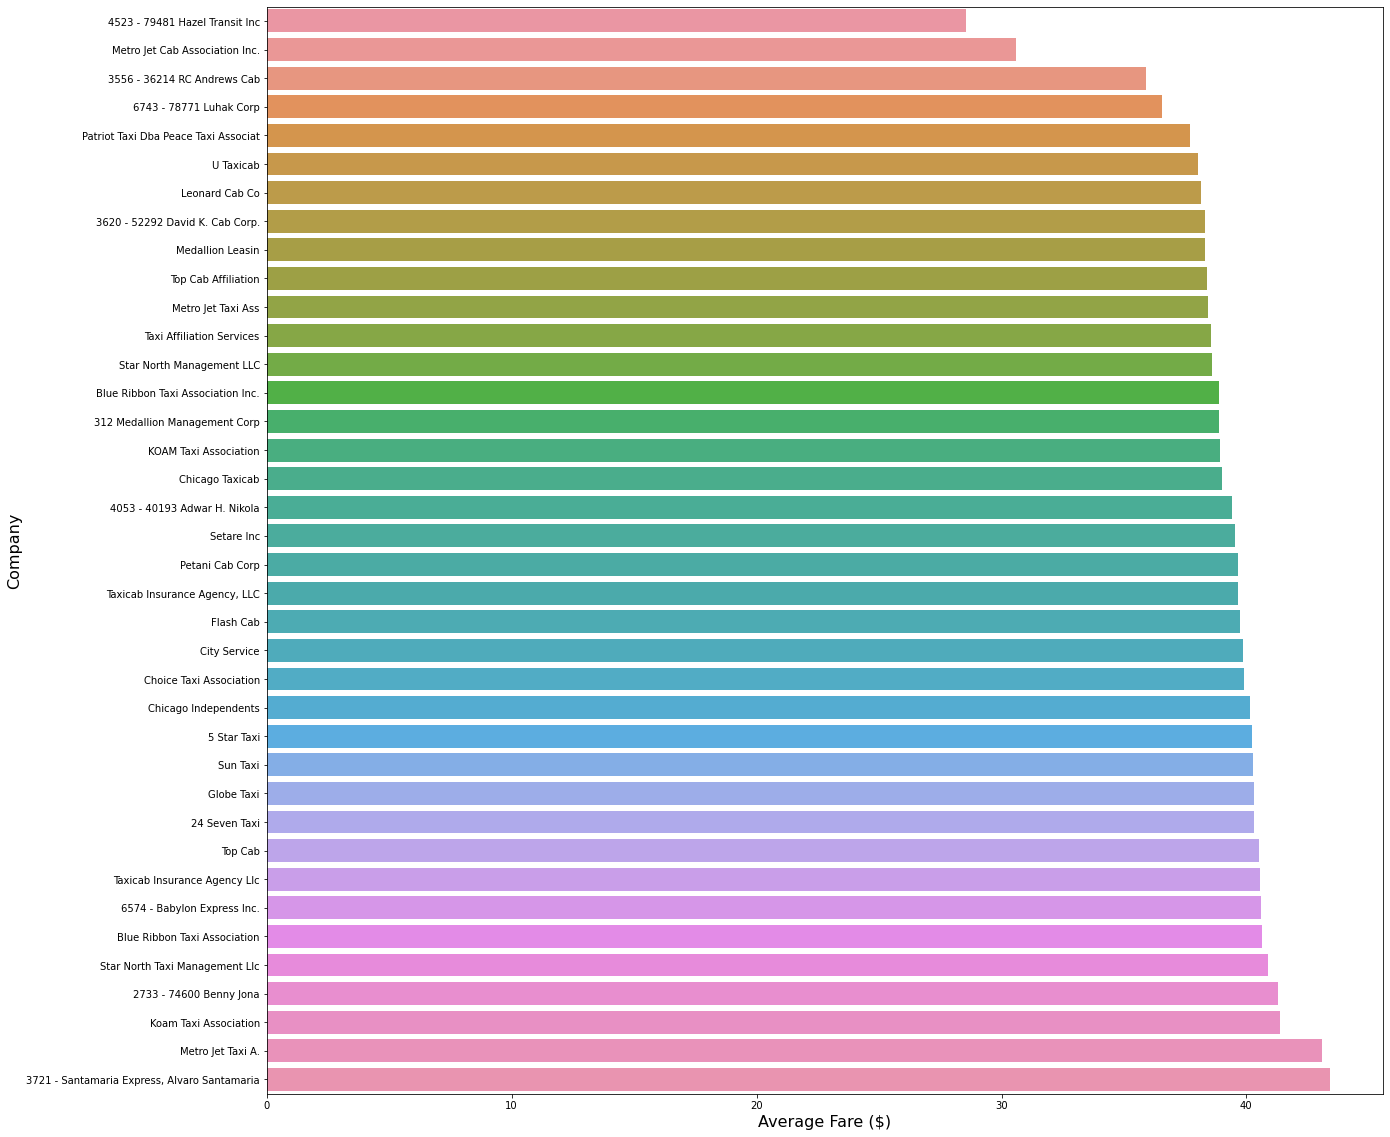

In [65]:
plt.figure(figsize= (20,20))
df_is_airport = df_with_tips[df_with_tips['Pickup at Airport']==1]
df_pickup_air = df_is_airport[['company','fare_dollars']]
df_pickup_air = df_pickup_air.groupby('company',as_index=False)['fare_dollars'].mean()
df_pickup_air = df_pickup_air.sort_values(by=['fare_dollars'])
sns.barplot(y='company',x='fare_dollars',data=df_pickup_air)
plt.xlabel('Average Fare ($)',fontsize=16)
plt.ylabel('Company',fontsize=16)

**When at airport, which are the fastest taxis?**

Text(0, 0.5, 'Company')

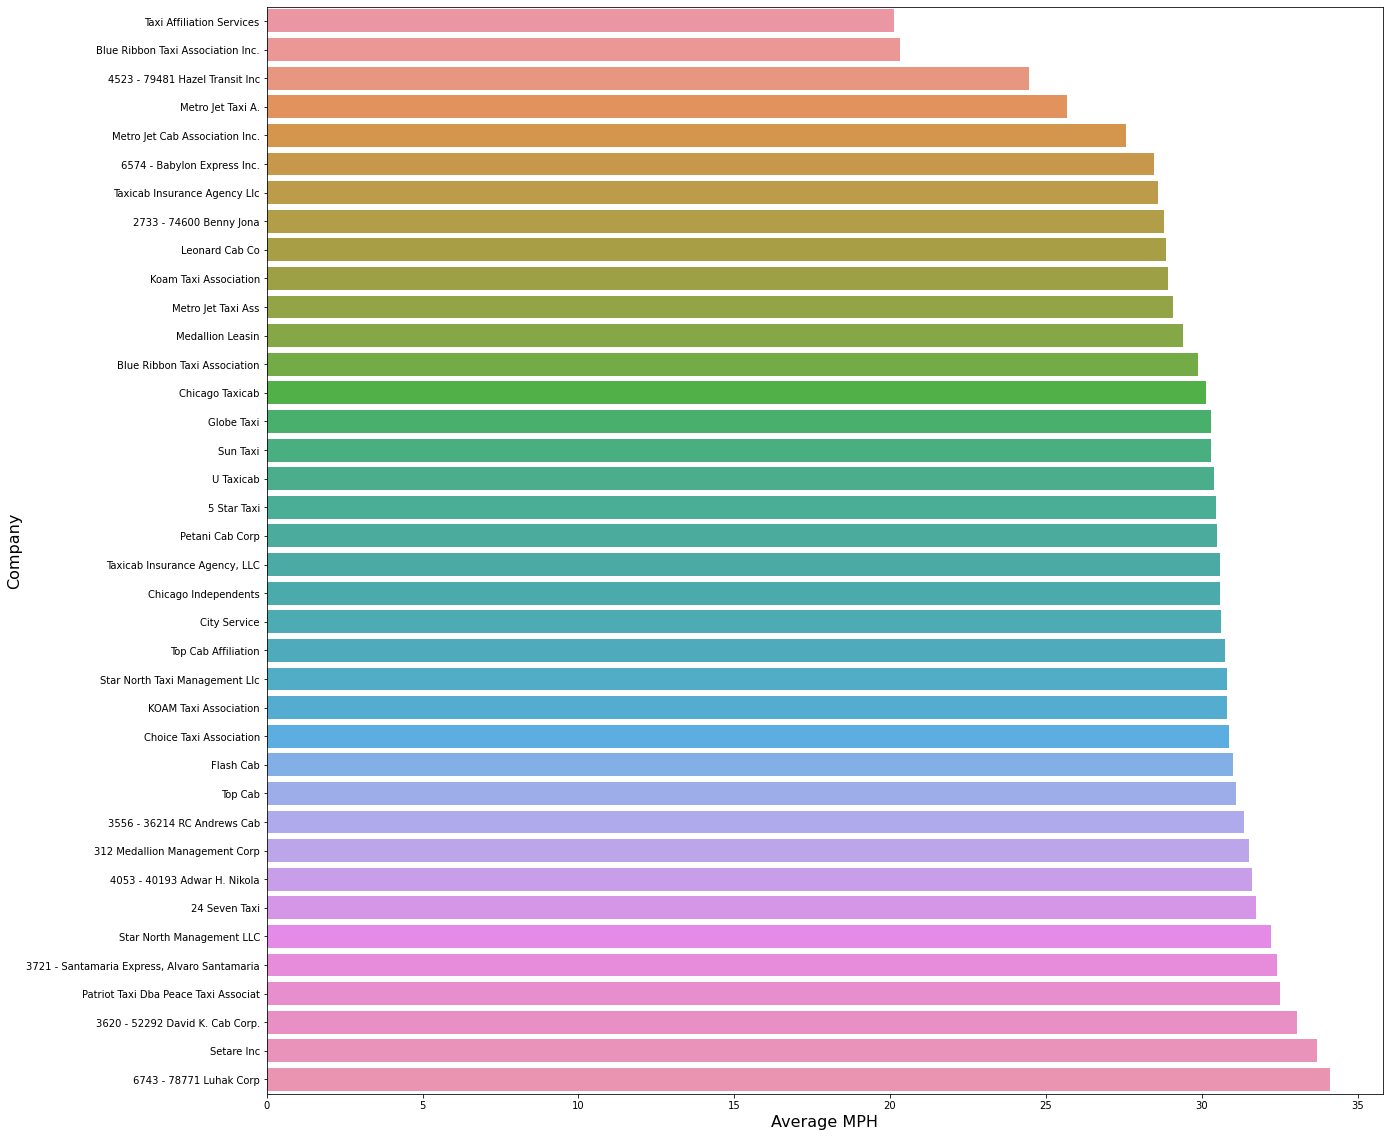

In [20]:
plt.figure(figsize= (20,20))
df_is_airport = df_with_tips[df_with_tips['Pickup at Airport']==1]
df_pickup_air = df_is_airport[['company','mph']]
df_pickup_air = df_pickup_air.groupby('company',as_index=False)['mph'].mean()
df_pickup_air = df_pickup_air.sort_values(by=['mph'])
sns.barplot(y='company',x='mph',data=df_pickup_air)
plt.xlabel('Average MPH',fontsize=16)
plt.ylabel('Company',fontsize=16)

*There doesn't appear to be too big of a difference in fare between the companies for rides that got picked up at the airport*

**Most Preferred Payment Methods?**

Text(0.5, 0, 'Payment Method')

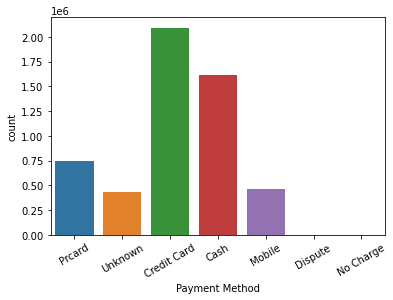

In [29]:
sns.countplot(x=df['payment_type'],data=df)
plt.xticks(rotation=30)
plt.xlabel('Payment Method')

**Does payment type have an effect on average fare?**

In [57]:

df_company = df_with_tips[['payment_type','fare_dollars']]
df_company_avg = df_company.groupby('payment_type')['fare_dollars'].mean()
df_avg = df_company_avg.to_frame()
df_avg = df_avg.sort_values(by=['fare_dollars'])
df_avg
#df_avg['payment type']=df_avg['payment type'].astype('category')
#sns.barplot(x='payment type',y='fare_dollars',data=df_avg)

,fare_dollars
payment_type,
Mobile,18.382237
Cash,22.907945
Unknown,24.465337
Prcard,25.514542
Dispute,26.256885
Credit Card,29.922796
No Charge,30.282567


In [65]:
a = df_with_tips[df_with_tips['payment_type']=='Mobile']
b = df_with_tips[df_with_tips['payment_type']=='Cash']
c = df_with_tips[df_with_tips['payment_type']=='Prcard']
d = df_with_tips[df_with_tips['payment_type']=='Dispute']
e = df_with_tips[df_with_tips['payment_type']=='Credit Card']
f_val,p = stats.f_oneway(a['fare_dollars'],b['fare_dollars'],c['fare_dollars'],d['fare_dollars'],e['fare_dollars'])
print(f_val,p)

93460.25557726681 0.0


**Does whether or not it is a holiday impact fare?**

In [67]:
df_holiday = df_with_tips[['Is Holiday','fare_dollars']]

In [76]:
mu1 = df_holiday[(df_holiday['Is Holiday']==1)]
mu2 = df_holiday[(df_holiday['Is Holiday']==0)]

In [84]:
sample1 = mu1.fare_dollars
sample2 = mu2.fare_dollars
_,p_value = ttest_ind(sample1.values,sample2.values)
print(round(p_value,8))

0.0


In [86]:
print(sample1.mean())
print(sample2.mean())

27.011153237751472
25.747645146515552


In [88]:
df_holiday = df_with_tips[['Holiday','fare_dollars']]
df_holiday_avg = df_holiday.groupby('Holiday')['fare_dollars'].mean()
df_holiday_avg = df_holiday_avg.to_frame()
df_holiday_avg = df_holiday_avg.sort_values(by=['fare_dollars'])
df_holiday_avg

,fare_dollars
Holiday,
St Patricks Day,24.093184
New Years,24.873416
Valentines Day,25.537400
Not a Holiday,25.747645
Martin Luther King Day,26.039139
Independence Day,26.188279
Halloween,27.058928
Thanksgiving,27.202315
Easter,28.434498


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Christmas'),
  Text(1, 0, 'Labor Day'),
  Text(2, 0, 'Memorial Day'),
  Text(3, 0, 'Halloween'),
  Text(4, 0, 'St Patricks Day'),
  Text(5, 0, 'Independence Day'),
  Text(6, 0, 'Martin Luther King Day'),
  Text(7, 0, 'Easter'),
  Text(8, 0, 'Thanksgiving'),
  Text(9, 0, 'New Years'),
  Text(10, 0, 'Valentines Day')])

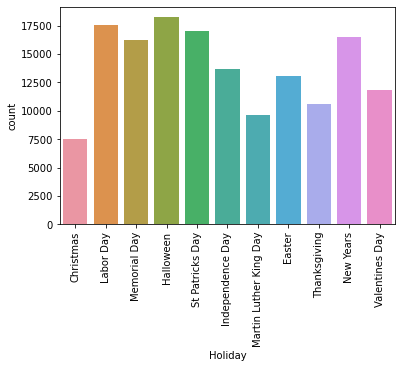

In [56]:
# Holidays that got the most rides
df_holiday = df[(df['Is Holiday']==1)]
sns.countplot(x='Holiday',data=df_holiday)
plt.xticks(rotation=90)

### Gas Price Analysis

- Throughout 2022, gas prices have seen a big increase, which is noted as a worthy factor in fare prices. Let us analyze weekly data and discover the relationship with gas price and fare rates

In [146]:
df_gas = pd.read_csv("C://Users//JCCLI//Downloads//Weekly_Chicago_Gas_Prices.csv")

In [147]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Week of                104 non-null    object 
 1   Weekly Gasoline Price  104 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [148]:
df_gas['Week of'] = pd.to_datetime(df_gas['Week of'])

In [149]:
df_gas['Week'] = df_gas['Week of'].dt.isocalendar().week

In [150]:
df_gas.head()
df_gas=df_gas.assign(month=pd.to_datetime(df_gas['Week of']).dt.strftime('%m'),year=pd.to_datetime(df_gas['Week of']).dt.strftime('%Y'))

In [61]:
df_gas.head()
df_gas = df_gas.drop('Week of',axis=1)

In [ ]:
df_gas['Week'] == df_gas['Week'].astype('category')

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

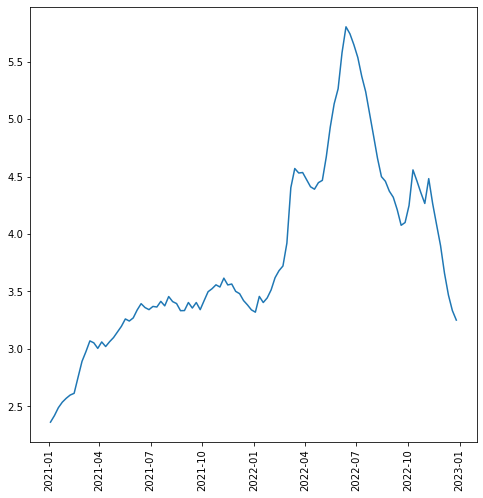

In [167]:
plt.figure(figsize = (8,8))
plt.plot(df_gas['Week of'],df_gas['Weekly Gasoline Price'])
plt.xticks(rotation=90)

In [24]:
# 2022 Weekly Gas Prices are hardcoded in 
def func(x):
    if x == 52:
        return 3.251
    elif x == 51:
        return 3.334
    elif x == 50:
        return 3.469
    elif x == 49:
        return 3.659
    elif x == 48:
        return 3.899
    elif x == 47:
        return 4.08
    elif x == 46:
        return 4.264
    elif x == 45:
        return 4.482
    elif x == 44:
        return 4.266
    elif x == 43:
        return 4.36
    elif x == 42:
        return 4.462
    elif x == 41:
        return 4.558
    elif x == 40:
        return 4.248
    elif x == 39:
        return 4.1
    elif x == 38:
        return 4.076
    elif x == 37:
        return 4.212
    elif x == 36:
        return 4.32
    elif x == 35:
        return 4.373
    elif x == 34:
        return 4.459
    elif x == 33:
        return 4.499
    elif x == 32:
        return 4.659
    elif x == 31:
        return 4.854
    elif x == 30:
        return 5.046
    elif x == 29:
        return 5.238
    elif x == 28:
        return 5.372
    elif x == 27:
        return 5.536
    elif x == 26:
        return 5.647
    elif x == 25:
        return 5.742
    elif x == 24:
        return 5.803
    elif x == 25:
        return 5.579
    elif x == 24:
        return 5.264
    elif x == 23:
        return 5.133
    elif x == 22:
        return 4.929
    elif x == 21:
        return 4.672
    elif x == 20:
        return 4.467
    elif x == 19:
        return 4.447
    elif x == 18:
        return 4.39
    elif x == 17:
        return 4.411
    elif x == 16:
        return 4.473
    elif x == 15:
        return 4.535
    elif x == 14:
        return 4.531
    elif x == 13:
        return 4.57
    elif x == 12:
        return 4.403
    elif x == 11:
        return 3.921
    elif x == 10:
        return 3.722
    elif x == 9:
        return 3.681
    elif x == 8:
        return 3.62
    elif x == 7:
        return 3.514
    elif x == 6:
        return 3.444
    elif x == 5:
        return 3.404
    elif x == 4:
        return 3.457
    elif x == 3:
        return 3.32
    elif x == 2:
        return 3.34
    else:
        return 3.30
df_2022['Weekly Gas Price'] = df_2022['Week'].apply(func)

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_5128\1893121549.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Weekly Gas Price'] = df_2022['Week'].apply(func)


In [143]:
df_trend['Weekly Gas Price'] = df_trend['Weekly Gas Price'].astype('float64')

C:\Users\JCCLI\AppData\Local\Temp\ipykernel_7636\3388132857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend['Weekly Gas Price'] = df_trend['Weekly Gas Price'].astype('float64')


**Association between features**

**EDA Findings and Conclusions**

1. The optimal hour to go on a taxi trip most days if you want to minimize the fare is during afternoon rush hour which also has the slowest speed due to traffic. However, if you want to have the shortest trip duration or fastest mph you should go at 2-3am (also when fare is more expensive).

2. The pickup and dropoff location does have a significant effect on the fare depending on amount of taxis available and other factors. The Airport (ORD or MDW) is the most expensive place to start out at and mostly end up at since according to Chicago Taxi Fares, there is a tax you must pay at the airport in addition to regular price.

3. Credit Card is the most popular payment method, and people that pay with Cash typically have less expensive trips as it would not make a lot of sense to pay a large fee in cash most places.

4. Trips that start in the Chicago Loop area (Navy Pier, Soldier Field) are the most likely to have slower trip times since they are some of the most popular tourist areas in Chicago so there will be lots of traffic.

5. There is evidence that when the gas price is higher, the average fare price is higher, but that could also be due to the trip timing and dates as well.

6. If you go on a holiday the fare rates can differ too especially depending on businesses and the traffic, especially on days like St Patrick's Day. Labor Day was shown to have the most expensive fare rates.

7. Some weather variables (mainly snow) can have an effect on the fare, but mainly things like rain don't have as much of an impact.

8. Sunday got the highest fares on average with Saturday getting the lowest.

9. Longer trips (both in mileage and duration) were more expensive on average.

### Recommendations for modeling

From the EDA, we can conclude that factors such as trip miles, and minutes can have an impact on the fare price. We also discovered other important factors such as the company, payment method, along with other variables such as the pickup and dropoff locations (especially airport), weather, holidays, and gas prices are significant factors in predicting the fare. We will use variables in our model that can be used immediately and not after the trip and are uncertain such as trip miles, tolls, and traffic. 

These include:

- company
- payment method
- pickup/dropoff location
- estimated gas price in Chicago based on week/month trends
- month
- weekday
- hour
- Is it a Snow Day?
- Is it Raining?
- Is the pickup location at the airport?
- Is the dropoff location at the airport?
- Is it a Holiday?
- If it is a Holiday, what one is it?

In [32]:
df_2022 = df[df['year']==2022]

In [33]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4351942 entries, 2615208 to 6967149
Data columns (total 42 columns):
 #   Column               Dtype         
---  ------               -----         
 0   trip_miles           float64       
 1   payment_type         object        
 2   company              object        
 3   pickup_latitude      float64       
 4   pickup_longitude     float64       
 5   dropoff_latitude     float64       
 6   dropoff_longitude    float64       
 7   fare_dollars         float64       
 8   trip_start_dt        datetime64[ns]
 9   trip_end_dt          object        
 10  year                 category      
 11  month                category      
 12  day                  category      
 13  hour                 category      
 14  weekday              object        
 15  dropoff_area         object        
 16  cost_per_mile        float64       
 17  cost_per_minute      float64       
 18  pick_up_area         object        
 19  mph            

In [34]:
df_2022.to_csv('C://Users//JCCLI//Downloads//Chicago_Taxi_Model.csv',index=False,header=True)